<a href="https://colab.research.google.com/github/nikhilkemkar/BikeSharingDemandPrediction/blob/main/BikeSharingDemandPrediction_bynikhil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - <font color='#E2532F'>**Bike Sharing Demand Prediction**</font>



##### **Project Type**    - Regression
##### **Contribution**    - DataMiners Team
##### **Team Member 1 -** Nikhil Kemkar
##### **Team Member 2 -** Aditya sakhare


# **Project Summary -**

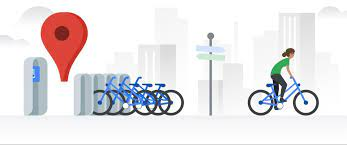

> Bike demand prediction is a common problem faced by bike rental companies, as accurately forecasting the demand for bikes can help optimize inventory and pricing strategies. In this project, I aim to develop a regression supervised machine learning model to predict the demand for bikes in a given time period.

> Originally dataset of bike rental information from a bike sharing company, had information including details on the number of bikes rented, the time and date of the rental, and various weather and seasonality features, information on other relevant factors that could impact bike demand, such as holidays, functioning or non functioning day.

> To evaluate the performance of our model, I used a variety of metrics, including mean absolute error, root mean squared error, and R-squared. I found that our model was able to make highly accurate predictions, with an R-squared value of 0.88 and a mean absolute error of just 2.58.In addition to evaluating the performance of our model on the test data, I also conducted a series of ablation studies to understand the impact of individual features on the model's performance.



# **GitHub Link -**

[link to Github](https://github.com/nikhilkemkar/BikeSharingDemandPrediction)

# **Problem Statement**


Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.



> My goal is to develop a model that is highly accurate, with a low mean absolute error and a high R-squared value. The model should also be able to provide insights into the factors that most impact bike demand, helping the bike sharing company to make data-driven decisions about how to optimize their operations.



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [7]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Datetime library for manipulating Date columns.
from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# Import different metrics from sci-kit libraries for model evaluation.
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

# Libraries for hypothesis testing
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import f

# Importing warnings library. The warnings module handles warnings in Python.
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [8]:

# reading data file
path="/content/SeoulBikeData (1).csv"
bike_df = pd.read_csv(path, encoding = 'ISO-8859-1')

### Dataset First View

In [9]:
# Dataset First Look
bike_df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [10]:
bike_df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

### Dataset Rows & Columns count

In [11]:
# Dataset Rows & Columns count
print(bike_df.shape)

(8760, 14)


In [12]:
print("Features of the dataset:")
bike_df.columns

Features of the dataset:


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

### Dataset Information

In [13]:
# Dataset Info
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [14]:
# Dataset Duplicate Value Count
print(f"Data is duplicated ? {bike_df.duplicated().value_counts()},unique values with {len(bike_df[bike_df.duplicated()])} duplication")

Data is duplicated ? False    8760
dtype: int64,unique values with 0 duplication


In [15]:
#unique values
bike_df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [16]:
missing=bike_df.isnull().sum().sort_values(ascending=False)
missing

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

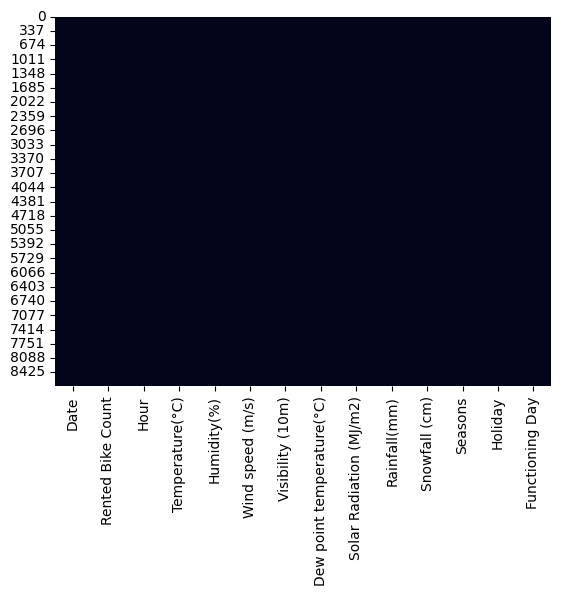

In [17]:
# Visualizing the missing values
sns.heatmap(bike_df.isnull(), cbar=False);

### What did you know about your dataset?

* There are 8760 observation and 14 features.
* In a day we have 24 hours and we have 365 days a year so 365 multiplied by 24 = 8760, which represents the number of line in the dataset
* There are no null values.
* Dataset has all unique values i.e., there is no duplicate, which means data is free from bias as duplicates which can cause problems in downstream analysis, such as biasing results or making it difficult to accurately summarize the data.
* Date has some object data types, it should be datetime data type.

## ***2. Understanding Your Variables***

In [18]:
# Dataset Columns
print(f'Features: {bike_df.columns.to_list()}')

Features: ['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday', 'Functioning Day']


In [19]:
# Dataset Describe
bike_df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

### Variables Description

**Date** : The date of the day, during 365 days from 01/12/2017 to 30/11/2018, formating in DD/MM/YYYY, type : str*, we need to convert into
         datetime format.

**Rented Bike Count** : Number of rented bikes per hour which our dependent variable and we need to predict that, type : int*

**Hour**: The hour of the day, starting from 0-23 it's in a digital time format, type : int, we need to convert it into category data type.*

**Temperature(°C)**: Temperature in Celsius, type : Float*

**Humidity(%)**: Humidity in the air in %, type : int*

**Wind speed (m/s)** : Speed of the wind in m/s, type : Float*

**Visibility (10m)**: Visibility in m, type : int*

**Dew point temperature(°C)**: Temperature at the beggining of the day, type : Float*

**Solar Radiation (MJ/m2)**: Sun contribution, type : Float*

**Rainfall(mm)**: Amount of raining in mm, type : Float*

**Snowfall (cm)**: Amount of snowing in cm, type : Float*

**Seasons**: Season of the year, type : str, there are only 4 season's in data* .

**Holiday**: If the day  is holiday period or not, type: str*

**Functioning Day**: If the day is a Functioning Day or not, type : str*


## ***3. Data Wrangling***

In [20]:
# Missing Values/Null Values Count
bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

###Duplicate Values

In [21]:
# Checking Duplicate Values
value=len(bike_df[bike_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


> In the above data after count the missing and duplicate value we came to know that there are no missing and duplicate value present.

### Changing column name


In [22]:
#Rename the complex columns name
bike_df=bike_df.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

> Python read "Date" column as a object type basically it reads as a string, as the date column is very important to analyze the users behaviour so we need to convert it into datetime format then we split it into 3 column i.e 'year', 'month', 'day'as a category data type.

###Breaking Date column

In [23]:
# Changing the "Date" column into three "year","month","day" column
bike_df['Date'] = bike_df['Date'].str.replace('-', '/')
bike_df['Date'] = bike_df['Date'].apply(lambda x: dt.datetime.strptime(x, "%d/%m/%Y"))


In [24]:
bike_df['year'] = bike_df['Date'].dt.year
bike_df['month'] = bike_df['Date'].dt.month
bike_df['day'] = bike_df['Date'].dt.day_name()

In [25]:
#creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
bike_df['weekdays_weekend']=bike_df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
bike_df=bike_df.drop(columns=['Date','day','year'],axis=1)

In [26]:
bike_df.head()

Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  Visibility  \
0                254     0         -5.2        37         2.2        2000   
1                204     1         -5.5        38         0.8        2000   
2                173     2         -6.0        39         1.0        2000   
3                107     3         -6.2        40         0.9        2000   
4                 78     4         -6.0        36         2.3        2000   

   Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall Seasons  \
0                  -17.6              0.0       0.0       0.0  Winter   
1                  -17.6              0.0       0.0       0.0  Winter   
2                  -17.7              0.0       0.0       0.0  Winter   
3                  -17.6              0.0       0.0       0.0  Winter   
4                  -18.6              0.0       0.0       0.0  Winter   

      Holiday Functioning_Day  month  weekdays_weekend  
0  No Holiday             Yes     12                 0  
1  No Holiday             Yes     12                 0  
2  No Holiday             Yes     12                 0  
3  No Holiday             Yes     12                 0  
4  No Holiday             Yes     12                 0

In [27]:
bike_df['weekdays_weekend'].value_counts()

0    6264
1    2496
Name: weekdays_weekend, dtype: int64

###Changing data type

> As "Hour","month","weekdays_weekend" column are show as a integer data type but actually it is a category data tyepe. so we need to change this data tyepe if we not then, while doing the further anlysis and correleted with this then the values are not actually true so we can mislead by this.

In [28]:
#Change the int64 column into catagory column
cols=['Hour','month','weekdays_weekend']
for col in cols:
  bike_df[col]=bike_df[col].astype('category')

In [29]:
#let's check the result of data type
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_Day        8760 non-null   object  
 13  month                  8760 non-null   category
 14  weekdays_weekend       8760 non-null   c

In [30]:
bike_df.columns

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day', 'month',
       'weekdays_weekend'],
      dtype='object')

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### Month

[Text(0.5, 1.0, 'Count of Rented bikes acording to Month')]

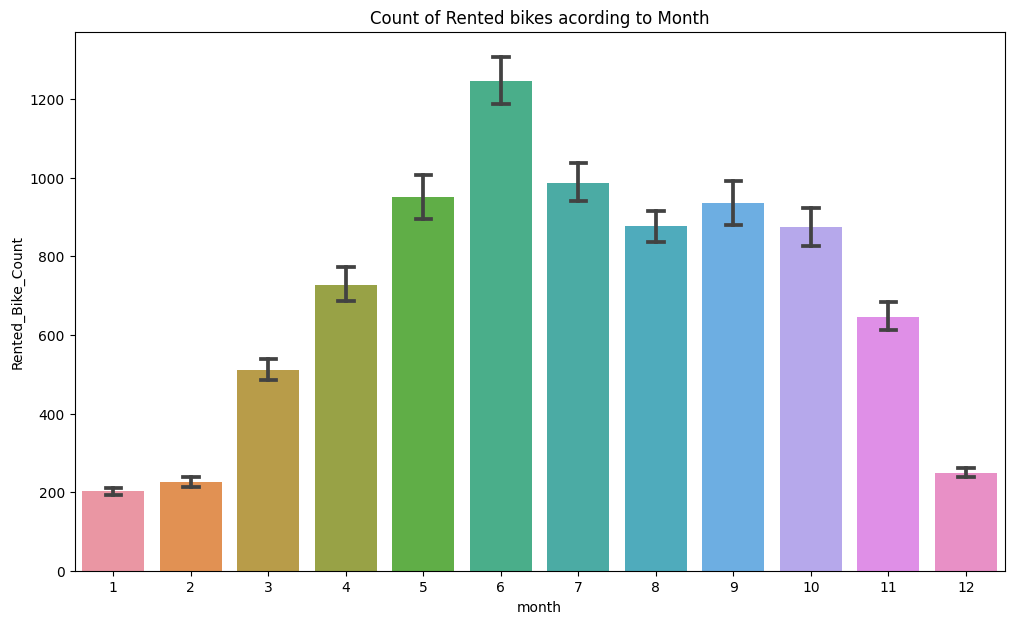

In [31]:
# Chart - 1 visualization code
fig,ax=plt.subplots(figsize=(12,7))
sns.barplot(data=bike_df,x='month',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Month')

#####What is/are the insight(s) found from the chart?

> From the above bar plot we can clearly say that, from the month 5 to 10 (May - October) the demand of the rented bike is high as compare to other months.These months came inside the summer season.

###Hour

[Text(0.5, 1.0, 'Count of Rented bikes acording to Hour ')]

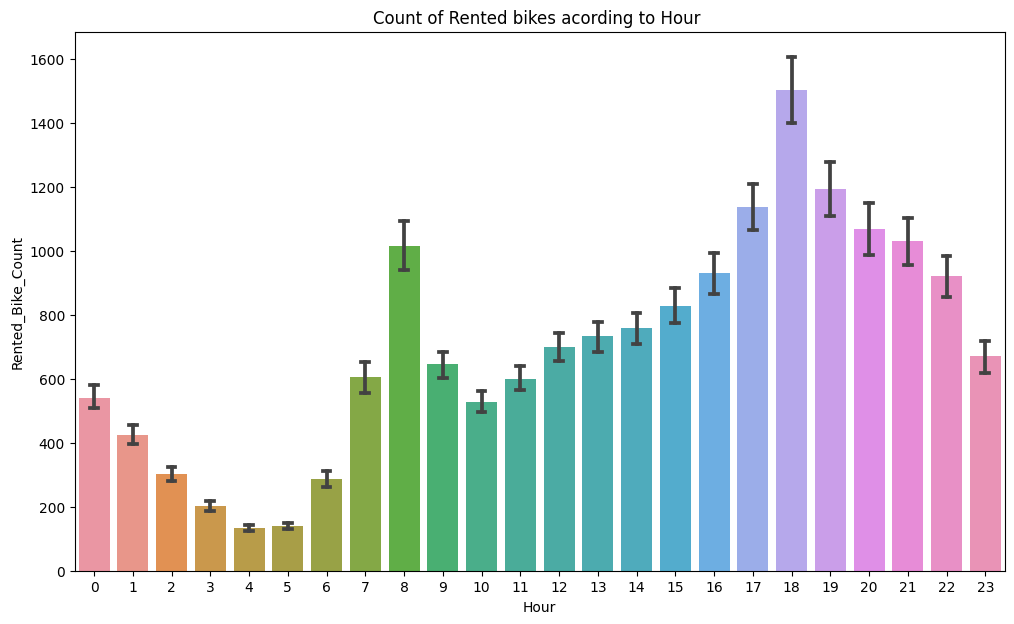

In [32]:
# Chart - 2 visualization code
fig,ax=plt.subplots(figsize=(12,7))
sns.barplot(data=bike_df,x='Hour',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Hour ')

#####What is/are the insight(s) found from the chart?

> In the above plot which shows, the use of rented bike according the hours and the data are from all over the year.

> generally people use rented bikes during their working hour from 7am to 9am and 5pm to 7pm.

###weekdays_weekend

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekenday ')]

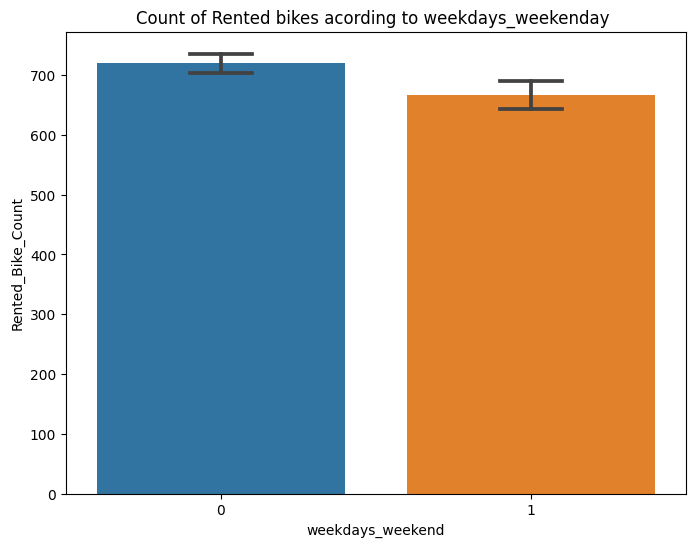

In [33]:
# Chart - 3 visualization code
fig,ax=plt.subplots(figsize=(8,6))
sns.barplot(data=bike_df,x='weekdays_weekend',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to weekdays_weekenday ')


[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekend ')]

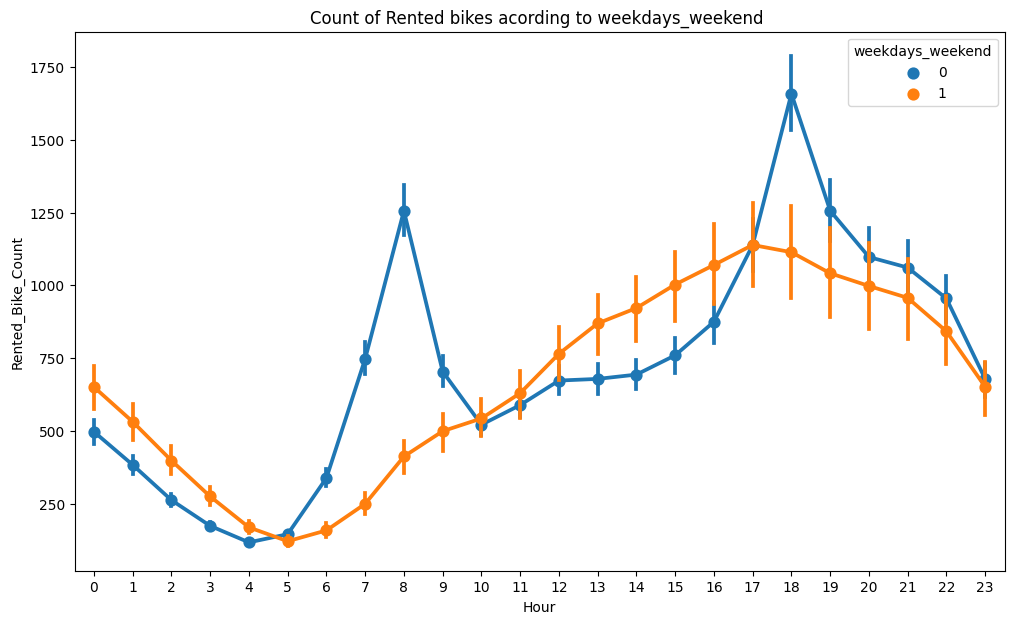

In [34]:
fig,ax=plt.subplots(figsize=(12,7))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='weekdays_weekend',ax=ax)
ax.set(title='Count of Rented bikes acording to weekdays_weekend ')

##### What is/are the insight(s) found from the chart?

> From the above point plot and bar plot we can say that, in the week days which represent in blue colur show that the demand of the bike higher because of the office.

###Functioning Day

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

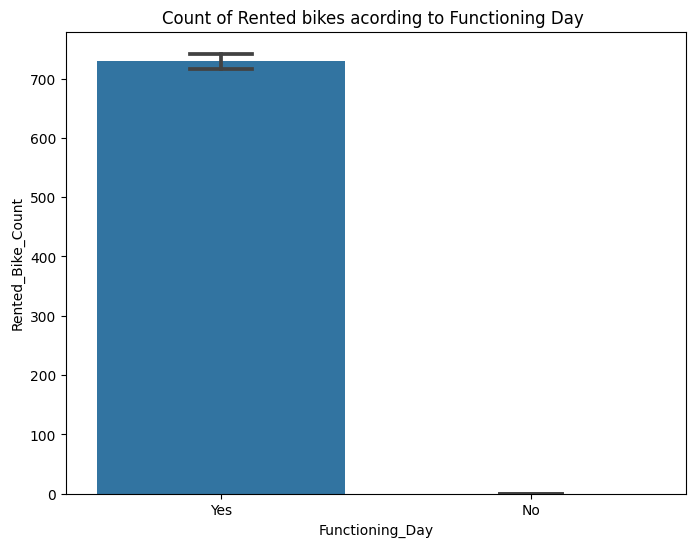

In [35]:
# Chart - 4 visualization code
fig,ax=plt.subplots(figsize=(8,6))
sns.barplot(data=bike_df,x='Functioning_Day',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

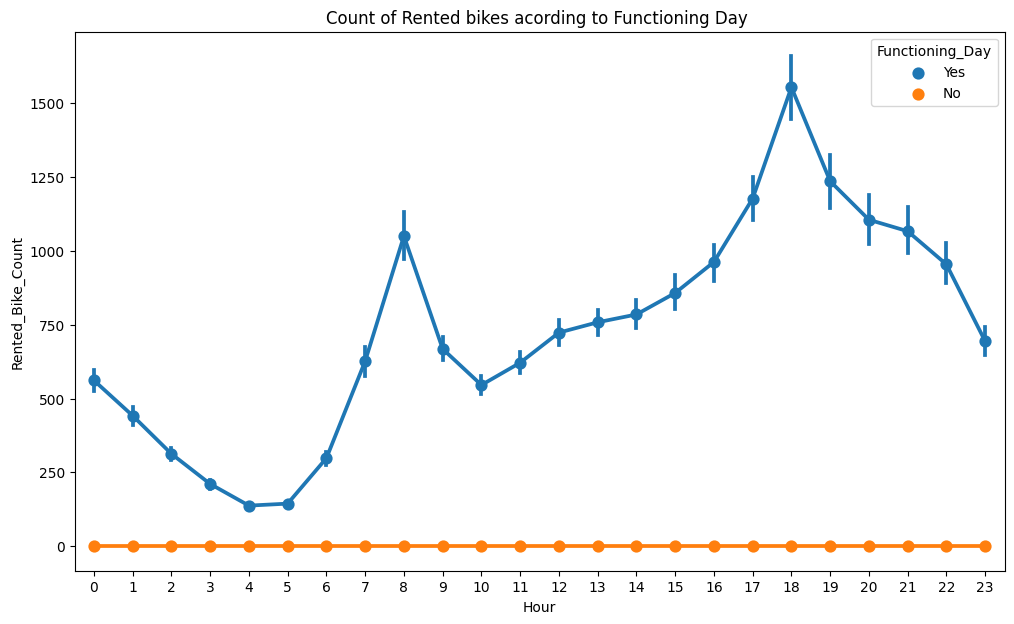

In [36]:
fig,ax=plt.subplots(figsize=(12,7))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Functioning_Day',ax=ax)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

##### What is/are the insight(s) found from the chart?

> the above bar plot and point plot which shows the use of rented bike in functioning day or non functioning day, and it clearly shows that,

> Peoples don't use reneted bikes in no functioning day.

### Seasons

[Text(0.5, 1.0, 'Count of Rented bikes acording to Seasons ')]

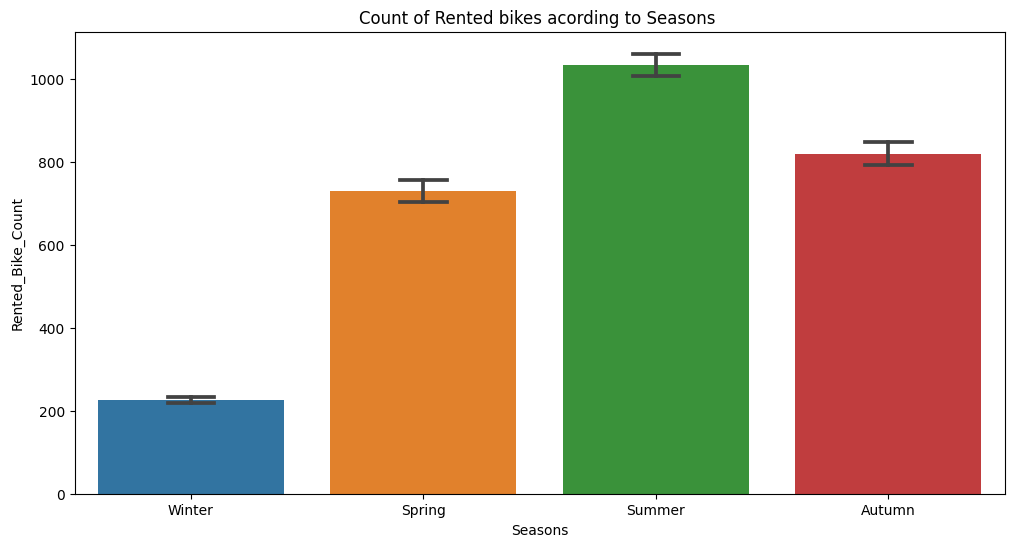

In [37]:
# Chart - 5 visualization code
fig,ax=plt.subplots(figsize=(12,6))
sns.barplot(data=bike_df,x='Seasons',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Seasons ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to seasons ')]

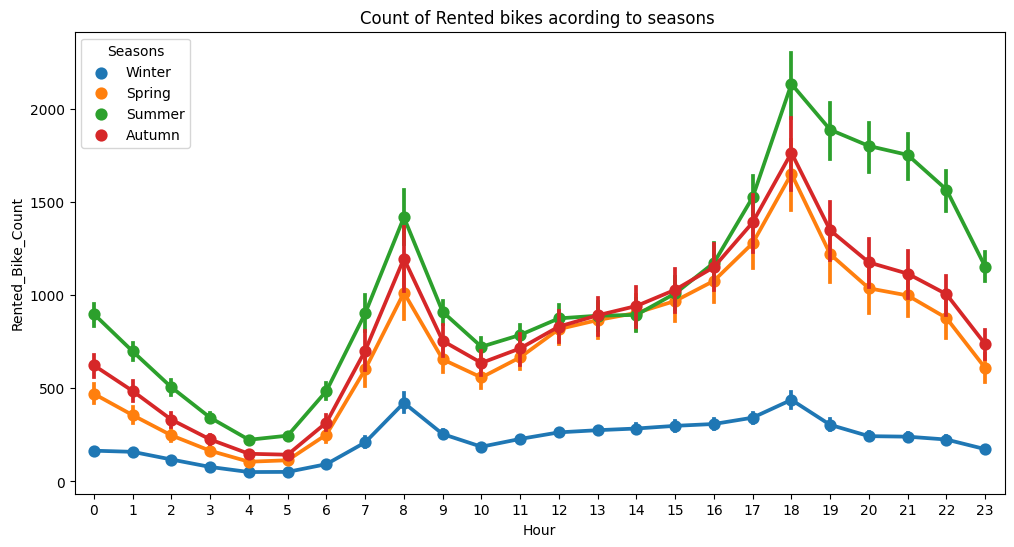

In [38]:
fig,ax=plt.subplots(figsize=(12,6))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Seasons',ax=ax)
ax.set(title='Count of Rented bikes acording to seasons ')

##### What is/are the insight(s) found from the chart?

> In the above bar plot and point plot which shows, the use of rented bike in four different seasons, and it clearly shows that,

> In summer season the use of rented bike is high and peak time is 7am-9am and 5pm-7pm.

### Holiday

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

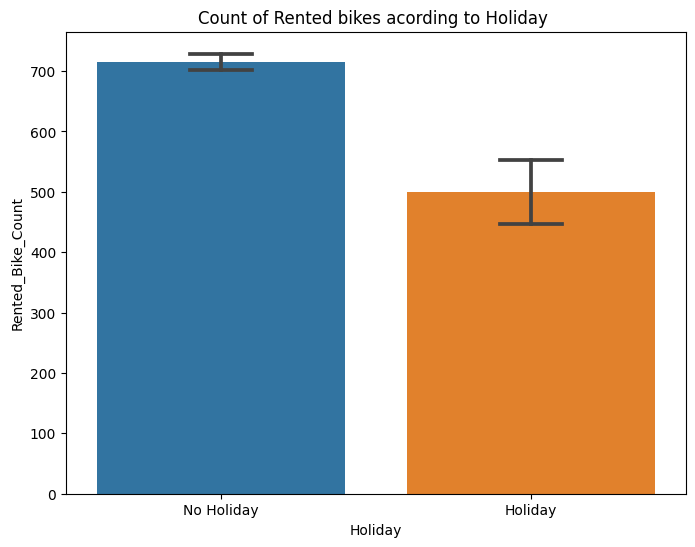

In [39]:
# Chart - 6 visualization code
fig,ax=plt.subplots(figsize=(8,6))
sns.barplot(data=bike_df,x='Holiday',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Holiday ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

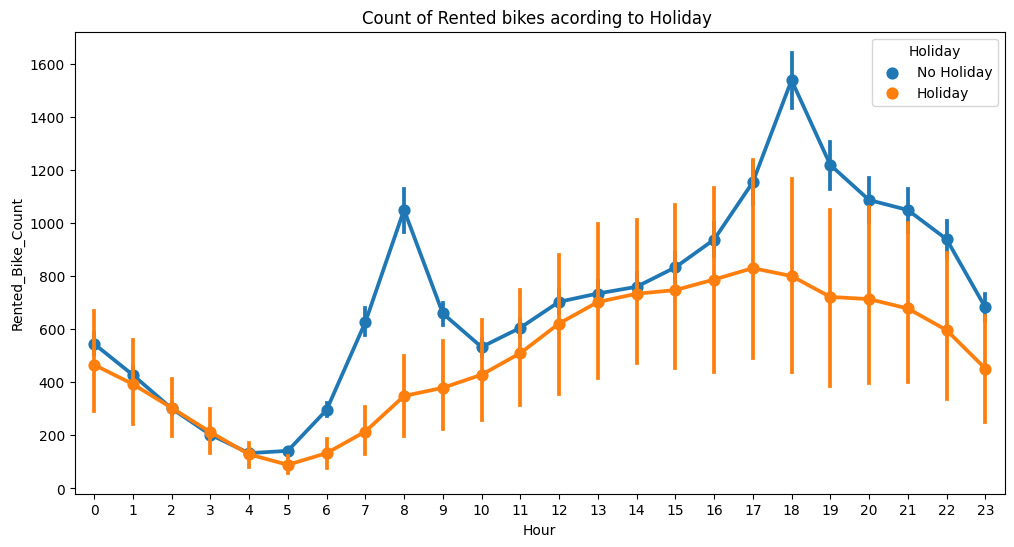

In [40]:
fig,ax=plt.subplots(figsize=(12,6))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Holiday',ax=ax)
ax.set(title='Count of Rented bikes acording to Holiday ')

##### 2. What is/are the insight(s) found from the chart?

> In the above bar plot and point plot which shows the use of rented bike in a holiday, and it clearly shows that,

> In holiday, people uses the rented bike from 2pm-8pm .

### Rented Bike Count sum with respect to different values

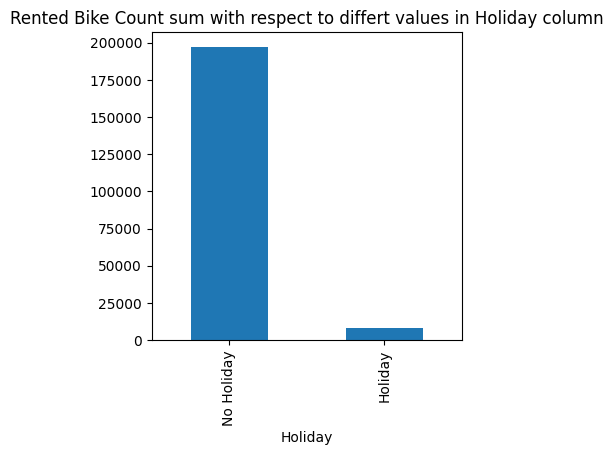

Holiday
No Holiday    197273.596399
Holiday         8090.539798
Name: Rented_Bike_Count, dtype: float64


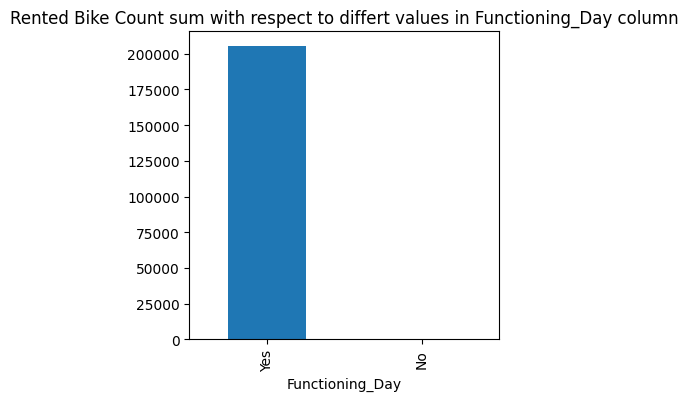

Functioning_Day
Yes    205364.136197
No          0.000000
Name: Rented_Bike_Count, dtype: float64


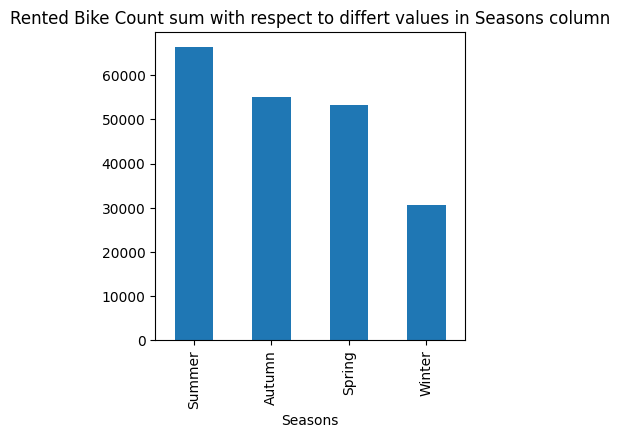

Seasons
Summer    66513.764873
Autumn    55023.820894
Spring    53240.118183
Winter    30586.432247
Name: Rented_Bike_Count, dtype: float64


In [82]:
# Chart - 2 visualization code
# since we have minimum unique values for Holiday(2), Functioning day(2), Seasons(4), and Year(2)
# we are plotting bar plot to understand total rented bikes sum with respect to each category

# creating a list to loop
x = ['Holiday', 'Functioning_Day', 'Seasons' ]

# looping for every element in the list
for elements in x:
  rented_bike_sum = bike_df.groupby(elements)['Rented_Bike_Count'].sum().sort_values(ascending = False)
  plt.rcParams['figure.figsize'] = (4,4)
  # plotting bar plot
  rented_bike_sum.plot.bar()

  #setting colum chart title to infer about the chart
  plt.title(f'Rented Bike Count sum with respect to differt values in {elements} column')
  plt.show()
  # printing values obtained for reference
  print(rented_bike_sum)

> Bar charts show the sum beautifully and helps us interpret in a better way.



##### 1. What is/are the insight(s) found from the chart?

1. the sum of Bikes rented on No Holiday is 5956419 and on Holiday is 215895
2. The sume of bikes rented on Functioning Day is 6172314 and on a non functioning day is 0
3. the following are the sum of bike rented with respect to various seasons
>```
Summer    2283234
Autumn    1790002
Spring    1611909
Winter     487169
>```
>it is found that in winter the bikes are rented less comparitivly and heighest in Summer
4. The total bikes rented in 2018 is 5986984 and in 2017 is 185330


1. It is observed that on a functioning day the bike rented sum is zero, means that on a non functioning day there were no bikes that were rented. the impact of non functioning day has lead to not running the business.
2. During winters the bikes are rented less in numbers which means winters affect the business negativly where as during summer the impact is good and more number of bikes were rented.



###Total Bike rented with respect to vairous rainfall

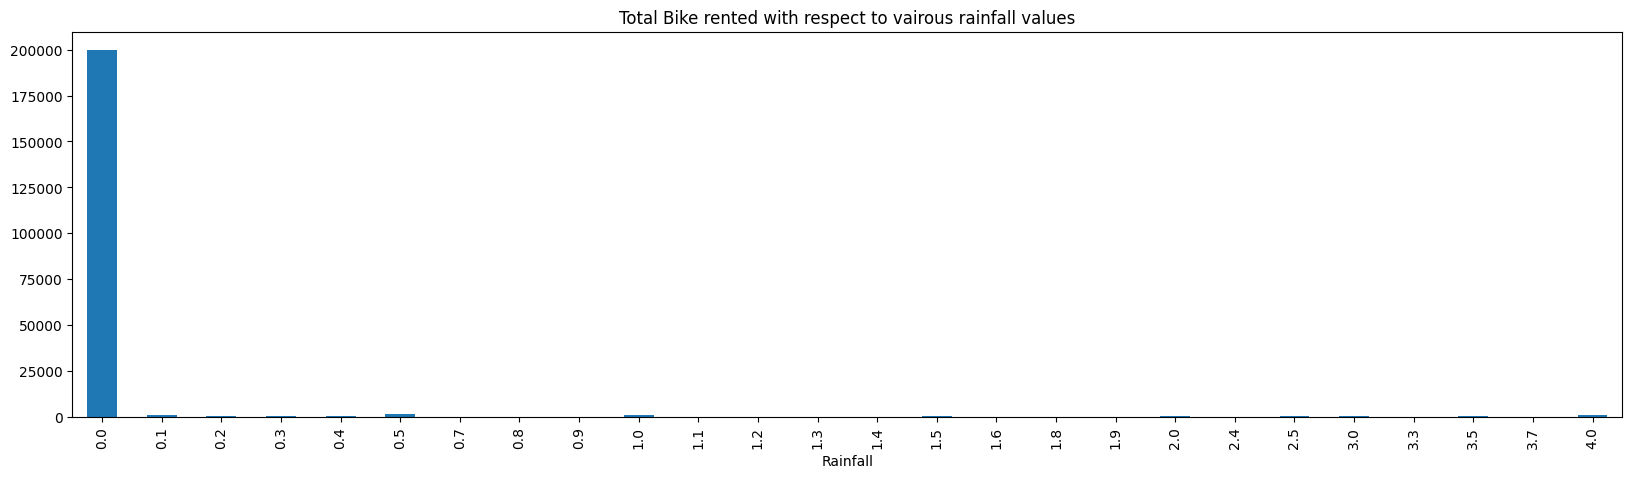

----------------------------------------------------------------------------------------------------
it is found mostly the bikes are rented when rainfall is 0.0, replotting the same after applying log transfrmation
----------------------------------------------------------------------------------------------------


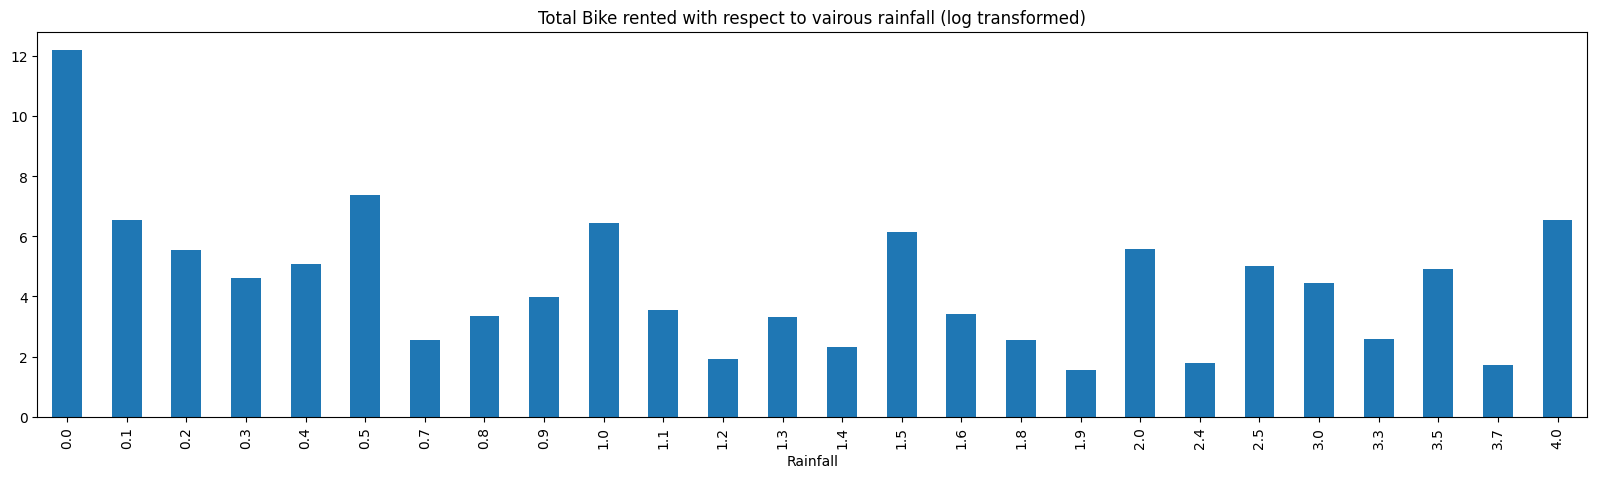

In [83]:
# Chart - 5 visualization code
rainfall_rent = bike_df.groupby(['Rainfall'])['Rented_Bike_Count'].sum()
plt.rcParams['figure.figsize'] = (20, 5)
rainfall_rent.plot.bar()
plt.title('Total Bike rented with respect to vairous rainfall values')
plt.show()
print('-'*100)
print('it is found mostly the bikes are rented when rainfall is 0.0, replotting the same after applying log transfrmation')
print('-'*100)

rainfall_rent_log = np.log(rainfall_rent)
# rainfall_rent_filtered = rainfall_rent[~(rainfall_rent.index == 0.0)]

rainfall_rent_log.plot.bar()
plt.title('Total Bike rented with respect to vairous rainfall (log transformed)')
plt.show()
# print(rainfall_rent_filtered)

##### 1. Why did you pick the specific chart?


Bar charts give a better understanding for the understanding this situation.

##### 2. What is/are the insight(s) found from the chart?

It was observed that the bike rent was more when the rainfall was 0.0, however when we excluded rainfall values of 0.0, we observed that most of the bikes that were rented were during less values of rainfall.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We can infer that most of the people rent bikes when there is less rainfall, and when the rainfall is more the sales dips with increase in rainfall values

###Total Rented Bike Count

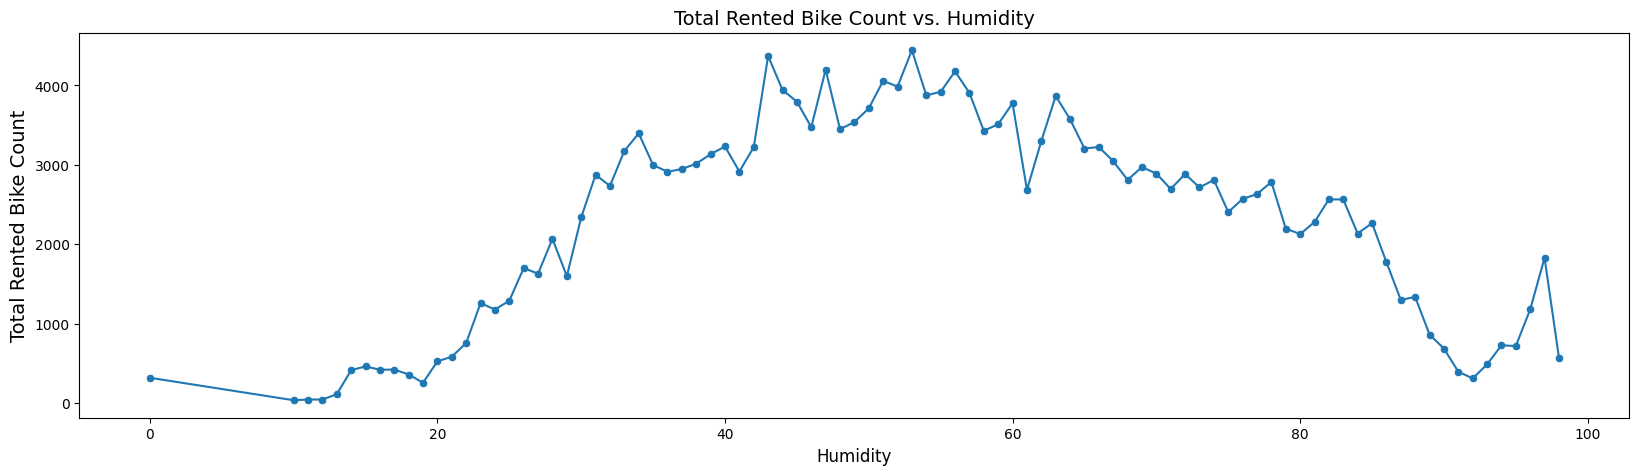

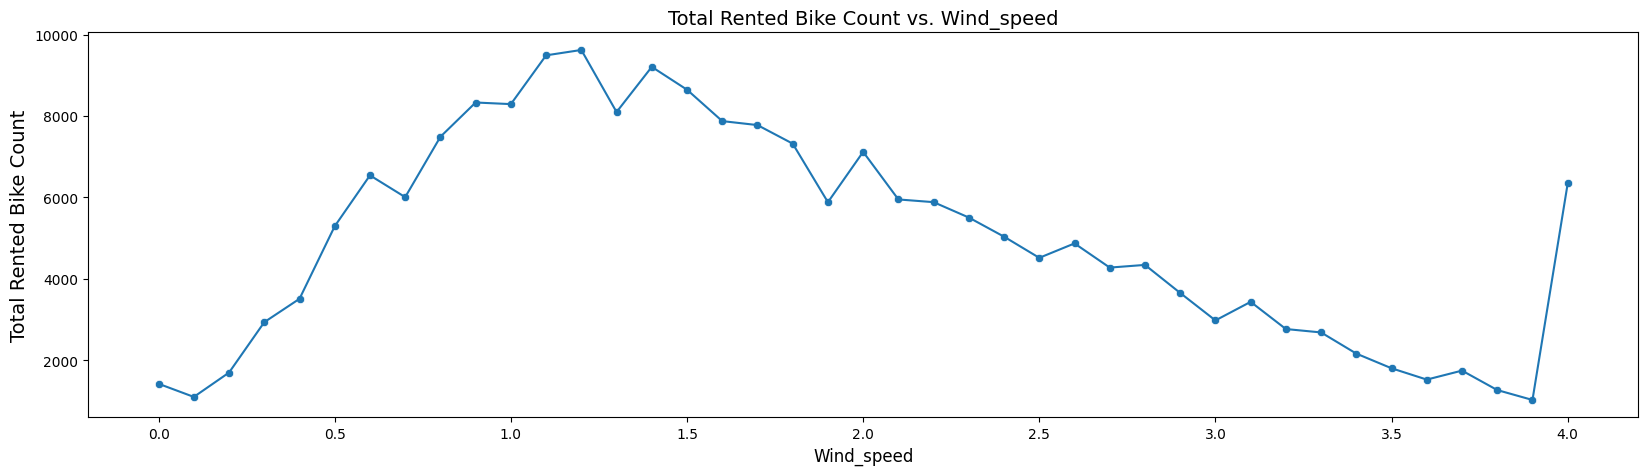

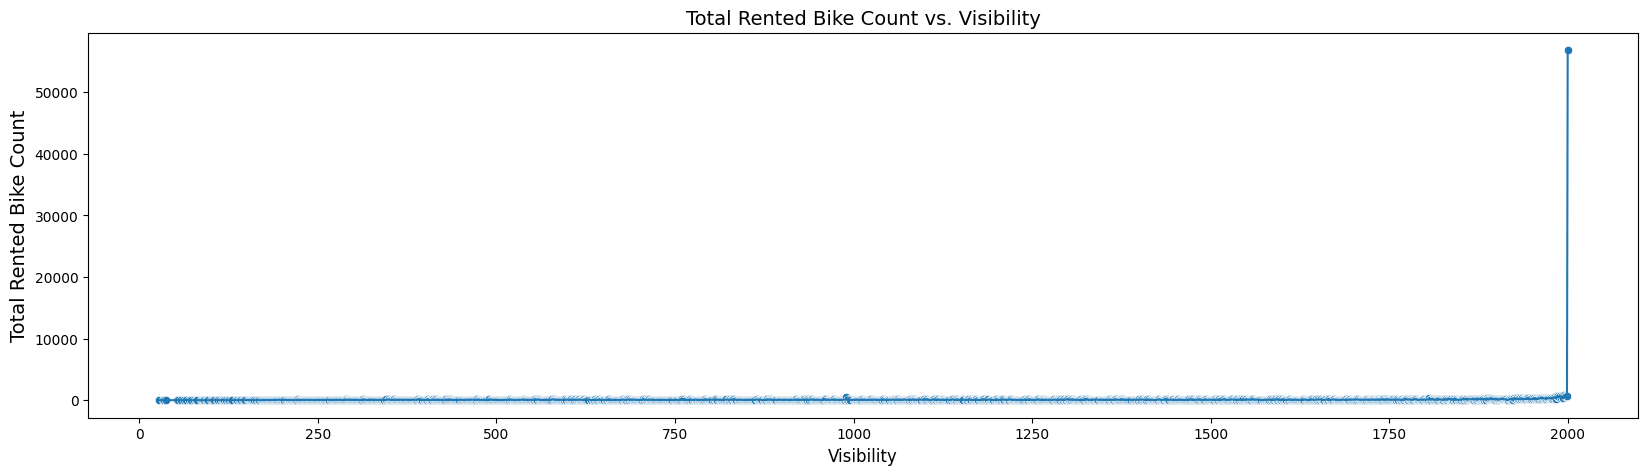

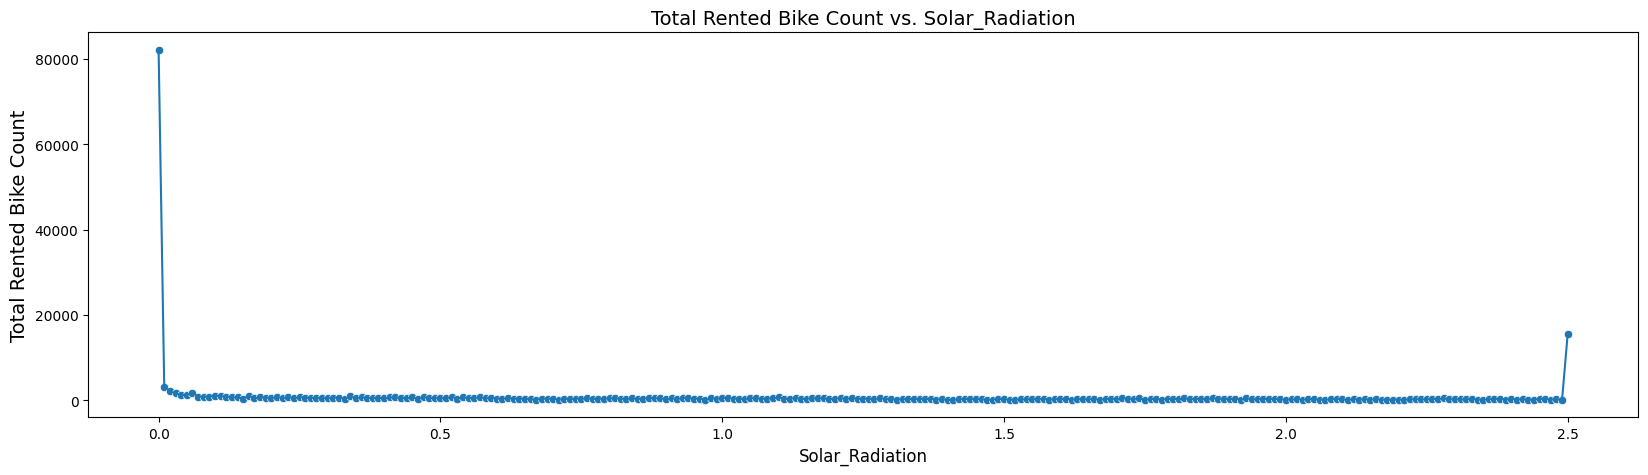

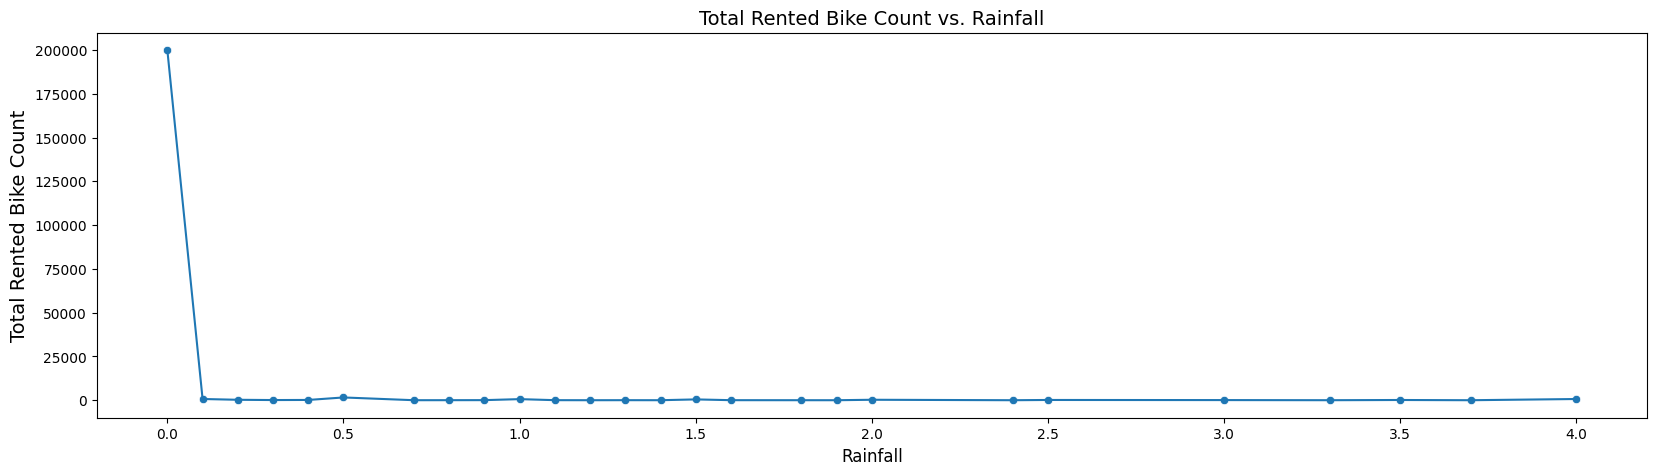

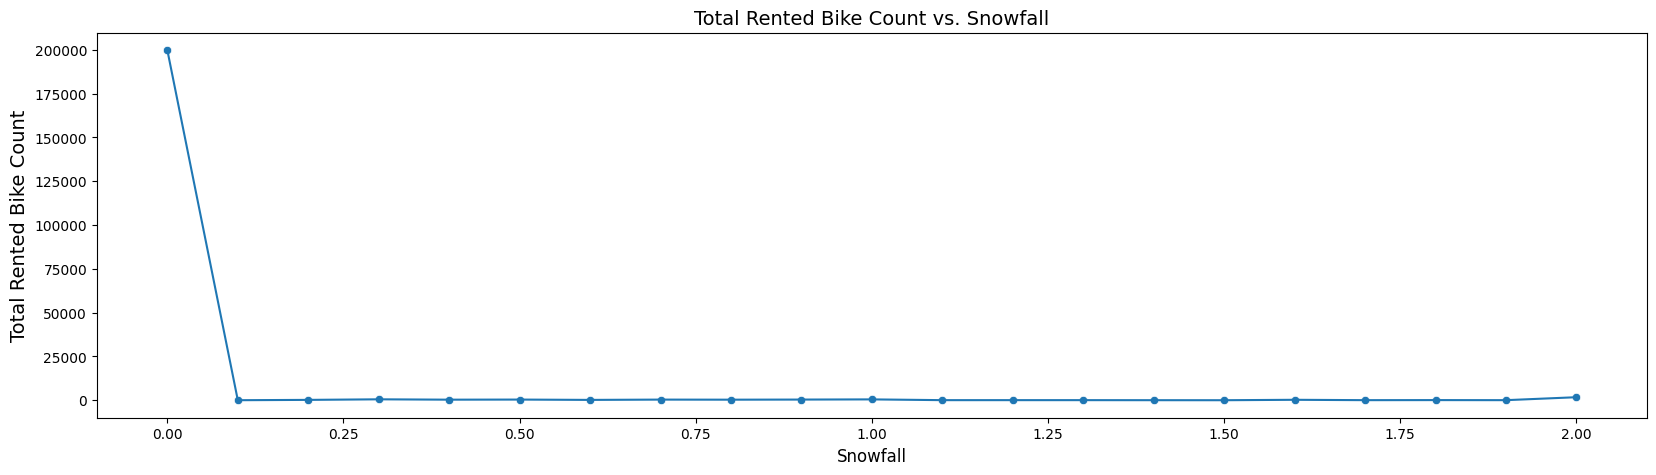

In [89]:
numrical_features = ['Humidity', 'Wind_speed',  'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall']

for feature in numrical_features:
  temp_df = bike_df.groupby([feature])['Rented_Bike_Count'].sum()
  temp_df = temp_df.reset_index()
  sns.scatterplot(data=temp_df, x=feature, y='Rented_Bike_Count')
  sns.lineplot(x=feature, y='Rented_Bike_Count', data=temp_df)
  plt.xlabel(feature,  fontsize=12)
  plt.ylabel('Total Rented Bike Count',  fontsize=14)
  plt.title(f'Total Rented Bike Count vs. {feature}',  fontsize=14)
  plt.show()

##### 1. Why did you pick the specific chart?

a line plot helps us understand the trends efficiently.

##### 2. What is/are the insight(s) found from the chart?

> The following observations we found:
1. when the wind speed is 0.3 to 4 people prefer to rent bike.
2. when the visibility is high(2000) people tend to rent bike more
3. when dew point temperature is -0.25 to 25 people tend to rent bike more.
4. when the soloar radiation is less(0.0), people tend to rent bike.
5. when the Rainfall is less(0.2), people tend to rent bike
6. when the snowfall is less(0.1), people tend to rent bike

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There is an impact of the weather conditions on the people renting bikes

###Histplot for Visibility

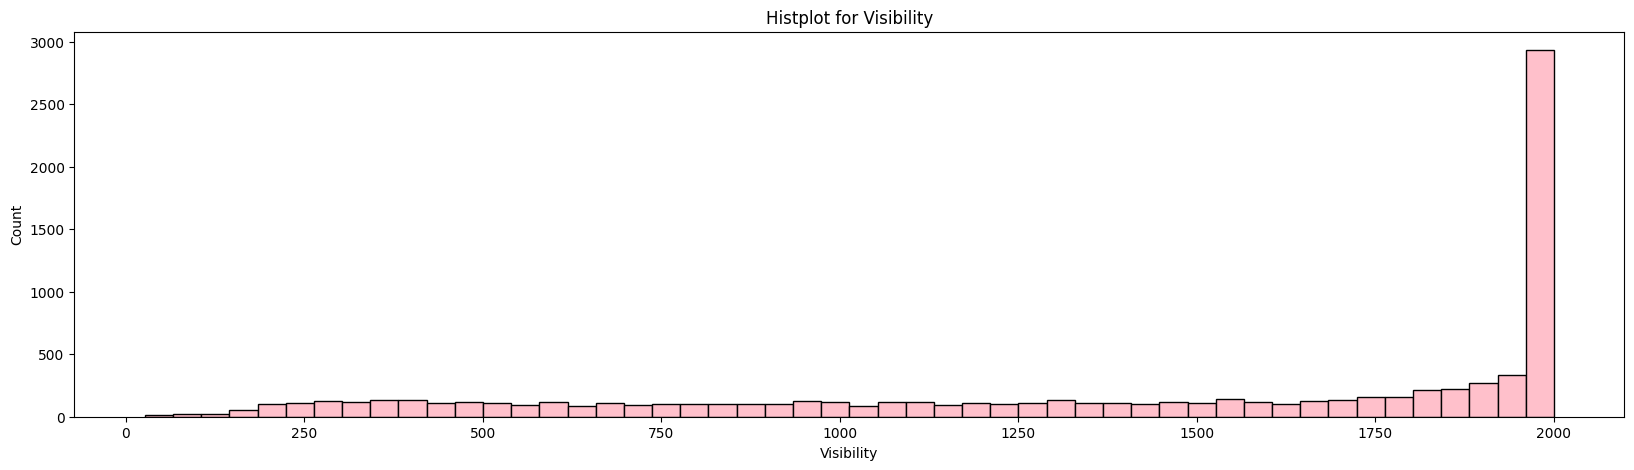

In [91]:


plt.hist(bike_df['Visibility'], bins=50, color='pink', edgecolor='black')

plt.xlabel('Visibility')
plt.ylabel('Count')
plt.title('Histplot for Visibility')
plt.show()


##### 1. Why did you pick the specific chart?

Histogram chart shows the quantitative of the visibility

##### 2. What is/are the insight(s) found from the chart?

Histogram chart shows the rental bikes are on huge demand when the visibility is 2000

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

When visibility is 2000 people prefer the most to rent bikes

###Analyze of Numerical variables

**What is Numerical Data**


> Numerical data differentiates itself from other number form data types with its ability to carry out arithmetic operations with these numbers.

> Numerical data is a data type expressed in numbers, rather than natural language description. Sometimes called quantitative data, numerical data is always collected in number form



In [41]:
# separate numerical features from the dataframe
numeric_features= bike_df.select_dtypes(exclude=['object','category'])
numeric_features

Rented_Bike_Count  Temperature  Humidity  Wind_speed  Visibility  \
0                   254         -5.2        37         2.2        2000   
1                   204         -5.5        38         0.8        2000   
2                   173         -6.0        39         1.0        2000   
3                   107         -6.2        40         0.9        2000   
4                    78         -6.0        36         2.3        2000   
...                 ...          ...       ...         ...         ...   
8755               1003          4.2        34         2.6        1894   
8756                764          3.4        37         2.3        2000   
8757                694          2.6        39         0.3        1968   
8758                712          2.1        41         1.0        1859   
8759                584          1.9        43         1.3        1909   

      Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  
0                     -17.6              0.0       0.0       0.0  
1                     -17.6              0.0       0.0       0.0  
2                     -17.7              0.0       0.0       0.0  
3                     -17.6              0.0       0.0       0.0  
4                     -18.6              0.0       0.0       0.0  
...                     ...              ...       ...       ...  
8755                  -10.3              0.0       0.0       0.0  
8756                   -9.9              0.0       0.0       0.0  
8757                   -9.9              0.0       0.0       0.0  
8758                   -9.8              0.0       0.0       0.0  
8759                   -9.3              0.0       0.0       0.0  

[8760 rows x 9 columns]

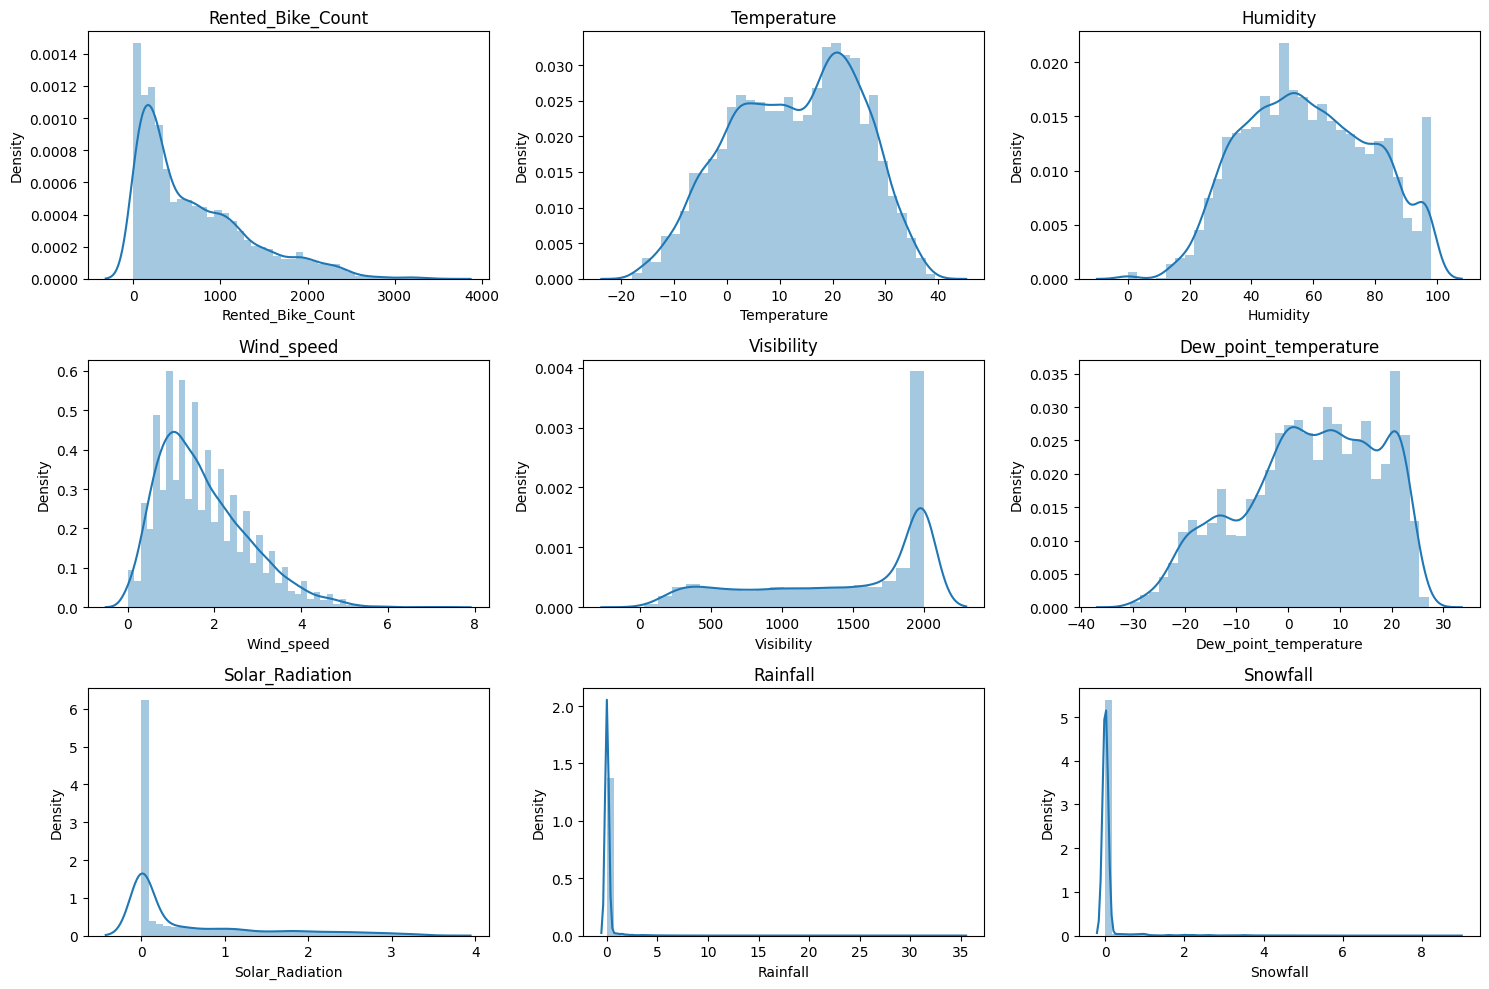

In [42]:
# printing displots to analyze the distribution of all numerical features

n=1
plt.figure(figsize=(15,10))
for i in numeric_features.columns:
  plt.subplot(3,3,n)
  n=n+1
  sns.distplot(bike_df[i])
  plt.title(i)
  plt.tight_layout()

**Right skewed columns are -**
> Rented Bike Count (Its also our Dependent variable), Wind speed (m/s), Solar Radiation (MJ/m2), Rainfall(mm), Snowfall (cm),

**Left skewed columns are -**
> Visibility (10m), Dew point temperature(°C)

####**Lets try to find how is the relation of numerical features with our dependent variable**

####**Numerical VS Rented Bike Count**

<Axes: xlabel='Temperature'>

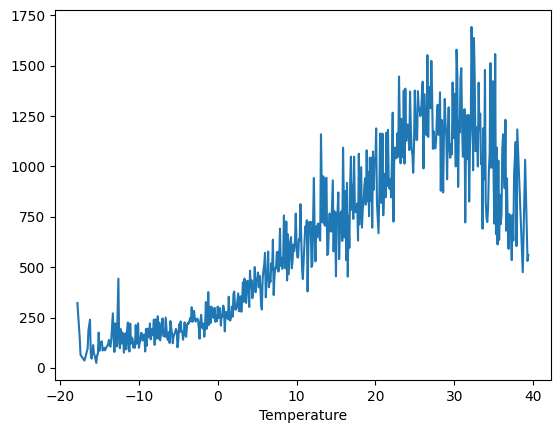

In [43]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Temperature"
bike_df.groupby('Temperature').mean()['Rented_Bike_Count'].plot()

> From the above plot we see that, people like to ride bikes when it is pretty hot around 25°C in average

<Axes: xlabel='Dew_point_temperature'>

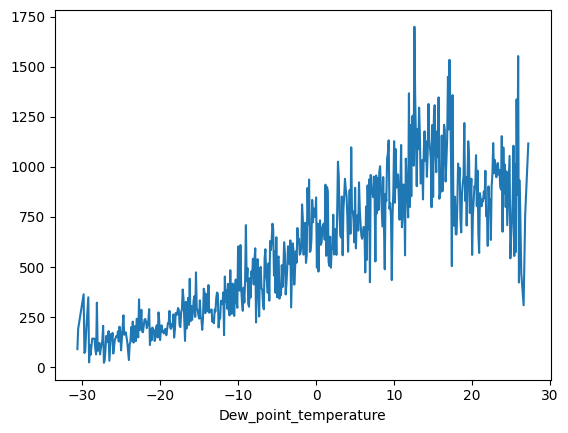

In [44]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Dew_point_temperature"
bike_df.groupby('Dew_point_temperature').mean()['Rented_Bike_Count'].plot()

> From the above plot of "Dew_point_temperature', is almost same as the 'temperature' there is some similarity present we can check it in our next step.

<Axes: xlabel='Solar_Radiation'>

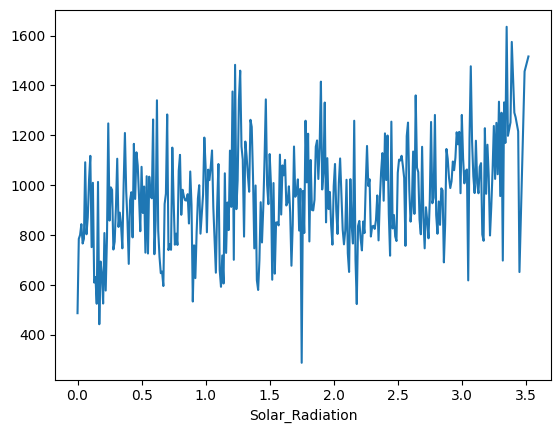

In [45]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Solar_Radiation"
bike_df.groupby('Solar_Radiation').mean()['Rented_Bike_Count'].plot()

> from the above plot we see that, the amount of rented bikes is huge, when there is solar radiation, the count of rents is around 1000

<Axes: xlabel='Snowfall'>

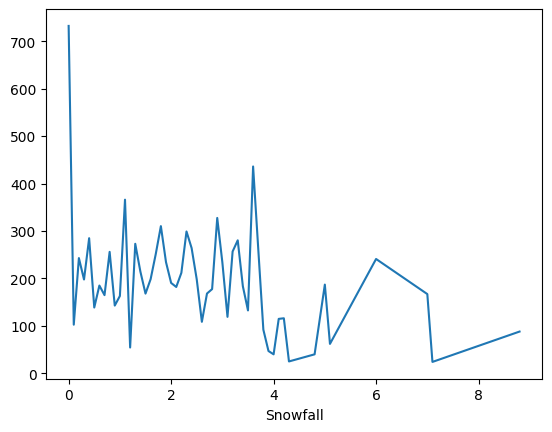

In [46]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Snowfall"
bike_df.groupby('Snowfall').mean()['Rented_Bike_Count'].plot()

> We can see from the plot that, on the y-axis, the amount of rented bike is very low. When we have more than 4 cm of snow, the bike rents is much lower

<Axes: xlabel='Rainfall'>

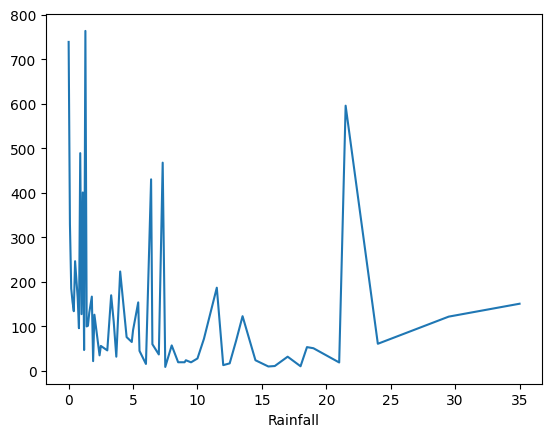

In [47]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Rainfall"
bike_df.groupby('Rainfall').mean()['Rented_Bike_Count'].plot()

> We can see from the above plot that, even if it rains a lot the demand of of rent bikes is not decreasing, here for example even if we have 20 mm of rain there is a big peak of rented bikes

<Axes: xlabel='Wind_speed'>

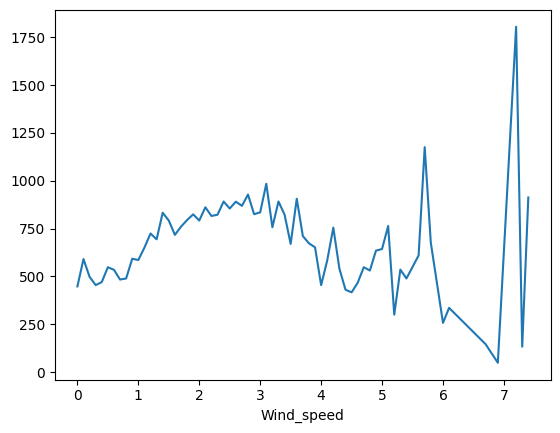

In [48]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Wind_speed"
bike_df.groupby('Wind_speed').mean()['Rented_Bike_Count'].plot()

> We can see from the above plot that, the demand of rented bike is uniformly distribute despite of wind speed but when the speed of wind is 7 m/s then the demand of bike also increase that clearly means people love to ride bikes when its little windy.

###Regression Plot

> The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses. Regression plots as the name suggests creates a regression line between 2 parameters and helps to visualize their linear relationships.

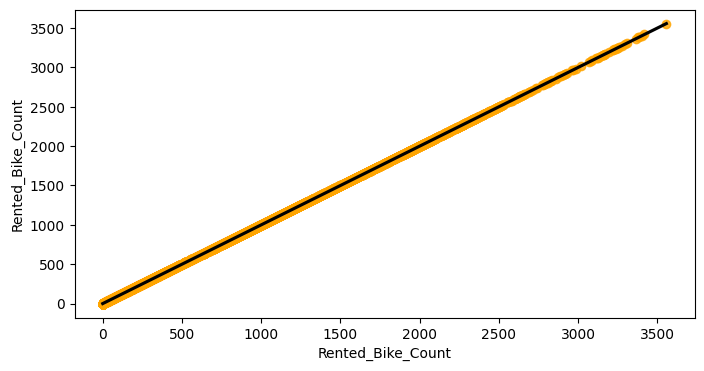

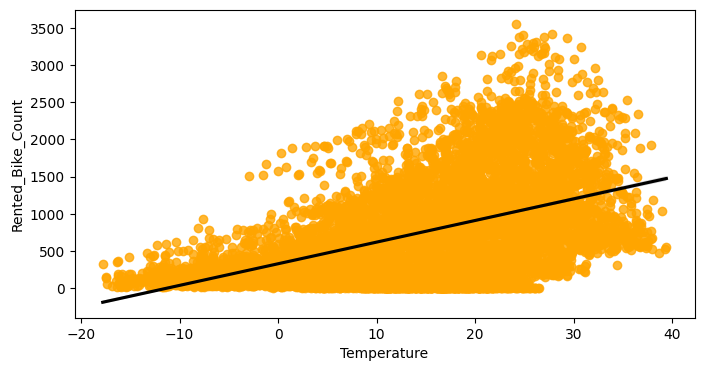

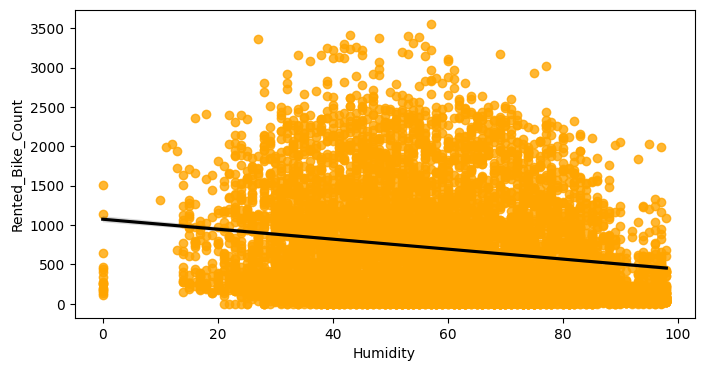

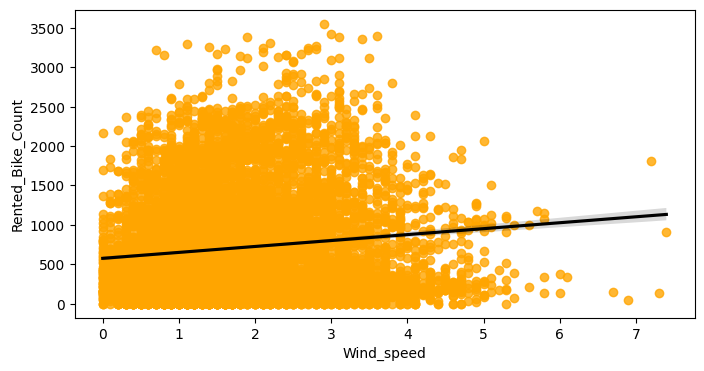

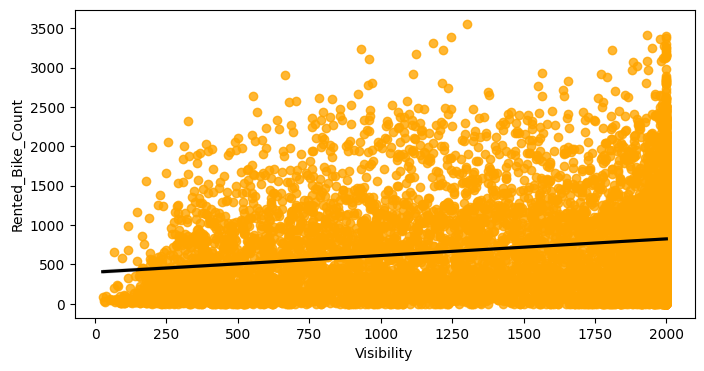

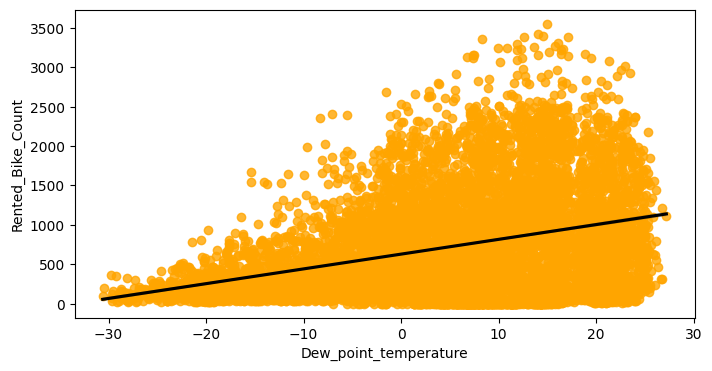

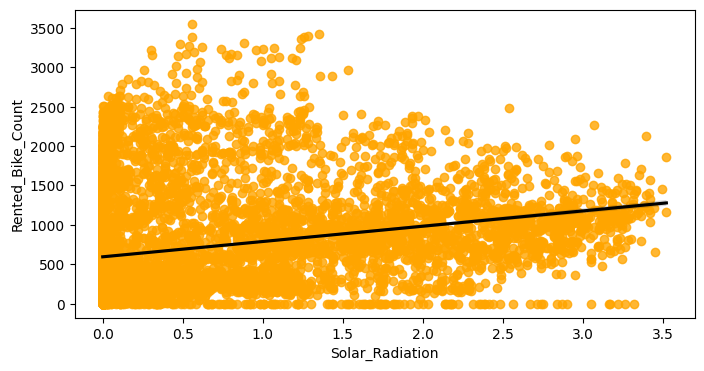

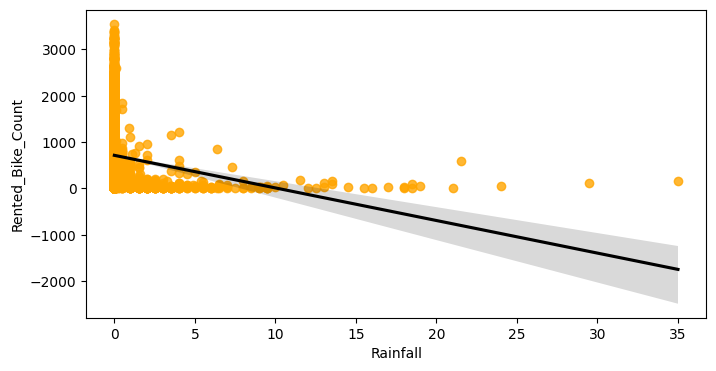

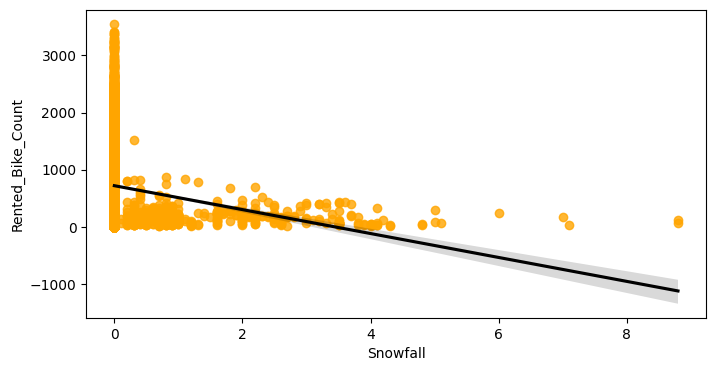

In [49]:
#printing the regression plot for all the numerical features
for col in numeric_features:
  fig,ax=plt.subplots(figsize=(8,4))
  sns.regplot(x=bike_df[col],y=bike_df['Rented_Bike_Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"})

> From the above regression plot of all numerical features we see that the columns 'Temperature', 'Wind_speed','Visibility', 'Dew_point_temperature', 'Solar_Radiation' are positively relation to the target variable.

> which means the rented bike count increases with increase of these features.

> 'Rainfall','Snowfall','Humidity' these features are negatively related with the target variaable which means the rented bike count decreases when these features increase.



####**Normalise Rented_Bike_Count column data**

> The data normalization (also referred to as data pre-processing) is a basic element of data mining. It means transforming the data, namely converting the source data in to another format that allows processing data effectively. The main purpose of data normalization is to minimize or even exclude duplicated data

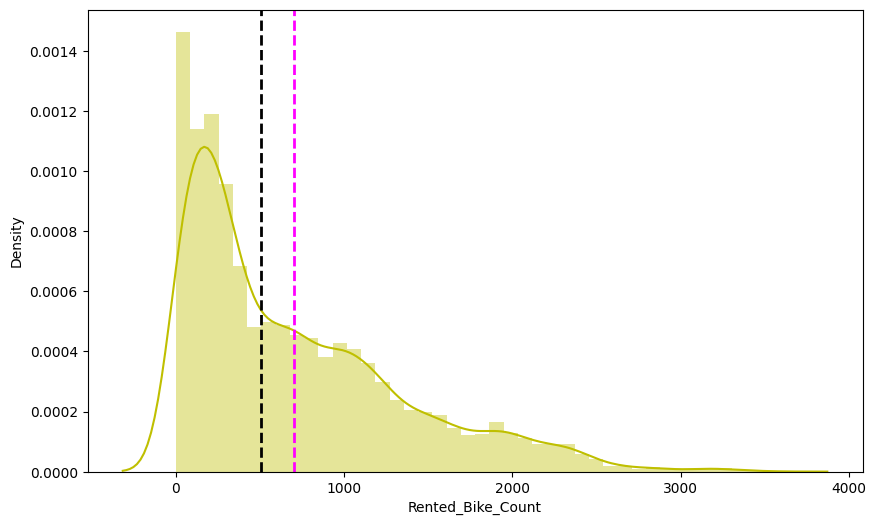

In [50]:
#Distribution plot of Rented Bike Count
plt.figure(figsize=(10,6))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
ax=sns.distplot(bike_df['Rented_Bike_Count'],hist=True ,color="y")
ax.axvline(bike_df['Rented_Bike_Count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(bike_df['Rented_Bike_Count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

> The above graph shows that, Rented Bike Count has moderate right skewness. Since the assumption of linear regression is that 'the distribution of dependent variable has to be normal', so we should perform some operation to make it normal.

###Finding Outliers and treatment

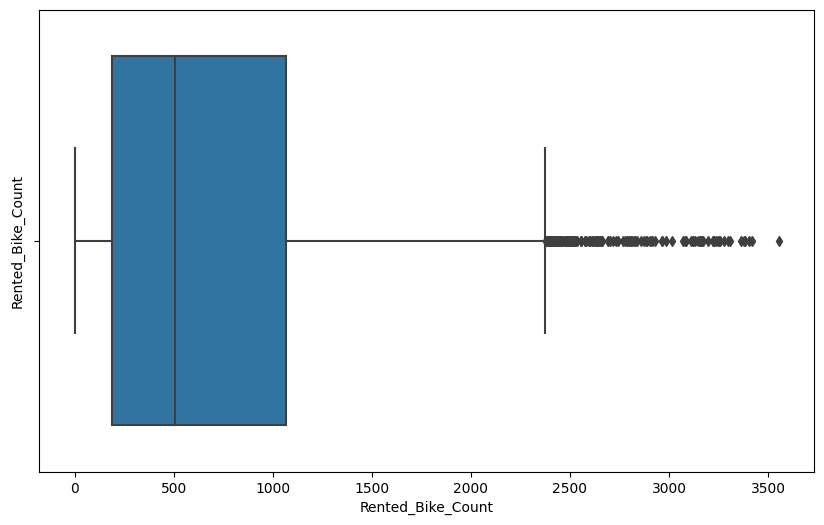

In [51]:
# Boxplot for Rented bike Count to check outliers
plt.figure(figsize=(10,6))

plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=bike_df['Rented_Bike_Count'])
plt.show()

In [52]:
# outliers treatments
bike_df.loc[bike_df['Rainfall']>=4,'Rainfall']= 4
bike_df.loc[bike_df['Solar_Radiation']>=2.5,'Solar_Radiation']=2.5
bike_df.loc[bike_df['Snowfall']>2,'Snowfall']= 2
bike_df.loc[bike_df['Wind_speed']>=4,'Wind_speed']= 4


> we have applied outlier treatment techniques to the dataset by replacing the outliers with the maximum values.

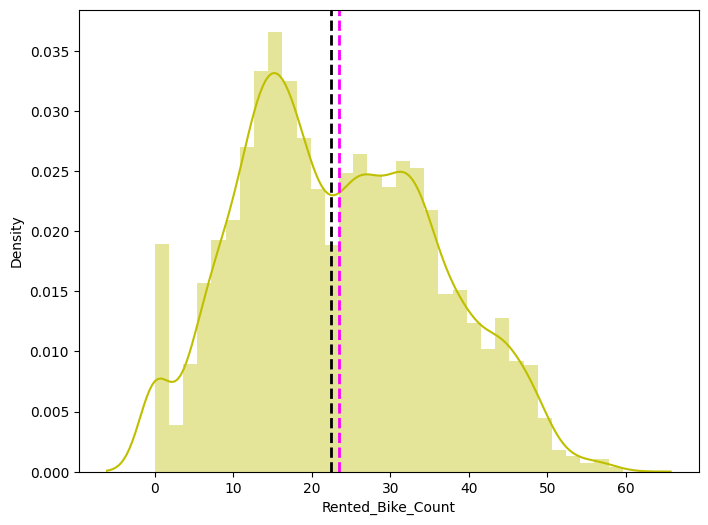

In [53]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(8,6))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(bike_df['Rented_Bike_Count']), color="y")
ax.axvline(np.sqrt(bike_df['Rented_Bike_Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(bike_df['Rented_Bike_Count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

> Since we have generic rule of applying Square root for the skewed variable in order to make it normal .After applying Square root to the skewed Rented Bike Count, here we get almost normal distribution.

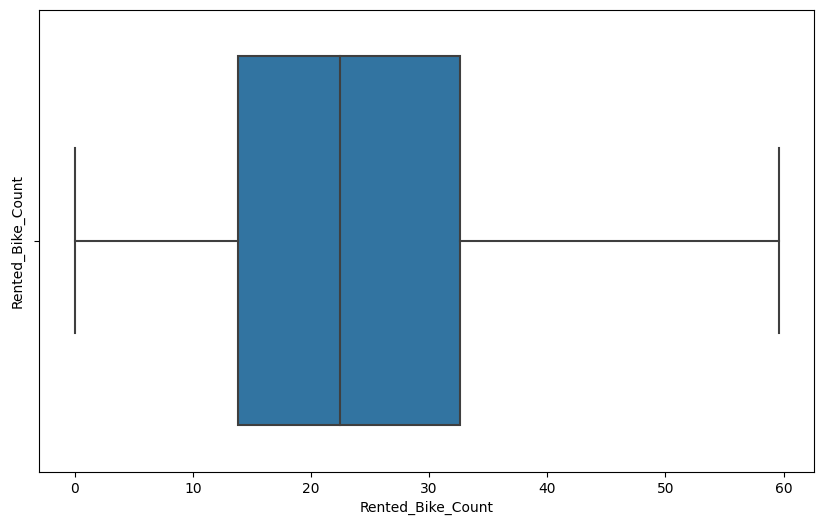

In [54]:
#After applying sqrt on Rented Bike Count check wheater we still have outliers
plt.figure(figsize=(10,6))

plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=np.sqrt(bike_df['Rented_Bike_Count']))
plt.show()

> After applying Square root to the Rented Bike Count column, we find that there is no outliers present.

In [55]:
bike_df.corr()

Rented_Bike_Count  Temperature  Humidity  Wind_speed  \
Rented_Bike_Count               1.000000     0.538558 -0.199780    0.131549   
Temperature                     0.538558     1.000000  0.159371   -0.031368   
Humidity                       -0.199780     0.159371  1.000000   -0.341432   
Wind_speed                      0.131549    -0.031368 -0.341432    1.000000   
Visibility                      0.199280     0.034794 -0.543090    0.173683   
Dew_point_temperature           0.379788     0.912798  0.536894   -0.174233   
Solar_Radiation                 0.265658     0.350679 -0.467236    0.342995   
Rainfall                       -0.174224     0.061274  0.331631   -0.038813   
Snowfall                       -0.160917    -0.263134  0.087086    0.008140   

                       Visibility  Dew_point_temperature  Solar_Radiation  \
Rented_Bike_Count        0.199280               0.379788         0.265658   
Temperature              0.034794               0.912798         0.350679   
Humidity                -0.543090               0.536894        -0.467236   
Wind_speed               0.173683              -0.174233         0.342995   
Visibility               1.000000              -0.176630         0.151105   
Dew_point_temperature   -0.176630               1.000000         0.090541   
Solar_Radiation          0.151105               0.090541         1.000000   
Rainfall                -0.238378               0.168386        -0.105920   
Snowfall                -0.109306              -0.195743        -0.080470   

                       Rainfall  Snowfall  
Rented_Bike_Count     -0.174224 -0.160917  
Temperature            0.061274 -0.263134  
Humidity               0.331631  0.087086  
Wind_speed            -0.038813  0.008140  
Visibility            -0.238378 -0.109306  
Dew_point_temperature  0.168386 -0.195743  
Solar_Radiation       -0.105920 -0.080470  
Rainfall               1.000000 -0.002297  
Snowfall              -0.002297  1.000000

###Checking in OLS Model

> Ordinary least squares (OLS) regression is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable

In [56]:
#import the module
#assign the 'x','y' value
import statsmodels.api as sm
X = bike_df[[ 'Temperature','Humidity',
       'Wind_speed', 'Visibility','Dew_point_temperature',
       'Solar_Radiation', 'Rainfall', 'Snowfall']]
Y = bike_df['Rented_Bike_Count']
bike_df.head()

Rented_Bike_Count Hour  Temperature  Humidity  Wind_speed  Visibility  \
0                254    0         -5.2        37         2.2        2000   
1                204    1         -5.5        38         0.8        2000   
2                173    2         -6.0        39         1.0        2000   
3                107    3         -6.2        40         0.9        2000   
4                 78    4         -6.0        36         2.3        2000   

   Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall Seasons  \
0                  -17.6              0.0       0.0       0.0  Winter   
1                  -17.6              0.0       0.0       0.0  Winter   
2                  -17.7              0.0       0.0       0.0  Winter   
3                  -17.6              0.0       0.0       0.0  Winter   
4                  -18.6              0.0       0.0       0.0  Winter   

      Holiday Functioning_Day month weekdays_weekend  
0  No Holiday             Yes    12                0  
1  No Holiday             Yes    12                0  
2  No Holiday             Yes    12                0  
3  No Holiday             Yes    12                0  
4  No Holiday             Yes    12                0

In [57]:
#add a constant column
X = sm.add_constant(X)
X

const  Temperature  Humidity  Wind_speed  Visibility  \
0       1.0         -5.2        37         2.2        2000   
1       1.0         -5.5        38         0.8        2000   
2       1.0         -6.0        39         1.0        2000   
3       1.0         -6.2        40         0.9        2000   
4       1.0         -6.0        36         2.3        2000   
...     ...          ...       ...         ...         ...   
8755    1.0          4.2        34         2.6        1894   
8756    1.0          3.4        37         2.3        2000   
8757    1.0          2.6        39         0.3        1968   
8758    1.0          2.1        41         1.0        1859   
8759    1.0          1.9        43         1.3        1909   

      Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  
0                     -17.6              0.0       0.0       0.0  
1                     -17.6              0.0       0.0       0.0  
2                     -17.7              0.0       0.0       0.0  
3                     -17.6              0.0       0.0       0.0  
4                     -18.6              0.0       0.0       0.0  
...                     ...              ...       ...       ...  
8755                  -10.3              0.0       0.0       0.0  
8756                   -9.9              0.0       0.0       0.0  
8757                   -9.9              0.0       0.0       0.0  
8758                   -9.8              0.0       0.0       0.0  
8759                   -9.3              0.0       0.0       0.0  

[8760 rows x 9 columns]

In [58]:
#fit an OLS model
model= sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented_Bike_Count   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     744.3
Date:                Wed, 06 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:49:06   Log-Likelihood:                -66827.
No. Observations:                8760   AIC:                         1.337e+05
Df Residuals:                    8751   BIC:                         1.337e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   699.4173    106.562      6.563      0.000     490.531     908.304
Temperature              40.3283      4.160      9.695      0.000      32.175      48.482
Humidity                 -8.5913      1.193     -7.203      0.000     -10.929      -6.253
Wind_speed               62.4552      5.951     10.495      0.000      50.790      74.121
Visibility               -0.0137      0.011     -1.254      0.210      -0.035       0.008
Dew_point_temperature    -5.0068      4.394     -1.139      0.255     -13.621       3.607
Solar_Radiation        -124.1270      9.254    -13.413      0.000    -142.267    -105.987
Rainfall               -162.0914     11.237    -14.425      0.000    -184.118    -140.065
Snowfall                 53.2592     19.061      2.794      0.005      15.895      90.623
==============================================================================
Omnibus:                      965.203   Durbin-Watson:                   0.344
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1618.702
Skew:                           0.770   Prob(JB):                         0.00
Kurtosis:                       4.436   Cond. No.                     3.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> R sqauare and Adj Square are near to each other. 40% of variance in the Rented Bike count is explained by the model.

> For F statistic , P value is less than 0.05 for 5% levelof significance.

> P value of dew point temp and visibility are very high and they are not significant.

> Omnibus tests the skewness and kurtosis of the residuals. Here the value of Omnibus is high., it shows we have skewness in our data.

> The condition number is large, 3.11e+04. This might indicate that there are strong multicollinearity or other numerical problems

> Durbin-Watson tests for autocorrelation of the residuals. Here value is less than 0.5. We can say that there exists a positive auto correlation among the variables.

In [59]:
X.corr()

const  Temperature  Humidity  Wind_speed  Visibility  \
const                    NaN          NaN       NaN         NaN         NaN   
Temperature              NaN     1.000000  0.159371   -0.031368    0.034794   
Humidity                 NaN     0.159371  1.000000   -0.341432   -0.543090   
Wind_speed               NaN    -0.031368 -0.341432    1.000000    0.173683   
Visibility               NaN     0.034794 -0.543090    0.173683    1.000000   
Dew_point_temperature    NaN     0.912798  0.536894   -0.174233   -0.176630   
Solar_Radiation          NaN     0.350679 -0.467236    0.342995    0.151105   
Rainfall                 NaN     0.061274  0.331631   -0.038813   -0.238378   
Snowfall                 NaN    -0.263134  0.087086    0.008140   -0.109306   

                       Dew_point_temperature  Solar_Radiation  Rainfall  \
const                                    NaN              NaN       NaN   
Temperature                         0.912798         0.350679  0.061274   
Humidity                            0.536894        -0.467236  0.331631   
Wind_speed                         -0.174233         0.342995 -0.038813   
Visibility                         -0.176630         0.151105 -0.238378   
Dew_point_temperature               1.000000         0.090541  0.168386   
Solar_Radiation                     0.090541         1.000000 -0.105920   
Rainfall                            0.168386        -0.105920  1.000000   
Snowfall                           -0.195743        -0.080470 -0.002297   

                       Snowfall  
const                       NaN  
Temperature           -0.263134  
Humidity               0.087086  
Wind_speed             0.008140  
Visibility            -0.109306  
Dew_point_temperature -0.195743  
Solar_Radiation       -0.080470  
Rainfall              -0.002297  
Snowfall               1.000000

> From the OLS model we find that the 'Temperature' and 'Dew_point_temperature' are highly correlated so we need to drop one of them.

> For droping them we check the (P>|t|) value from above table and we can see that the 'Dew_point_temperature' value is higher so we need to drop Dew_point_temperature column

> For clarity, we use visualisation i.e heatmap in next step

###Correlation Heatmap

A correlation Heatmap is a type of graphical representation that displays the correlation matrix, which helps to determine the correlation between different variables.

<Axes: >

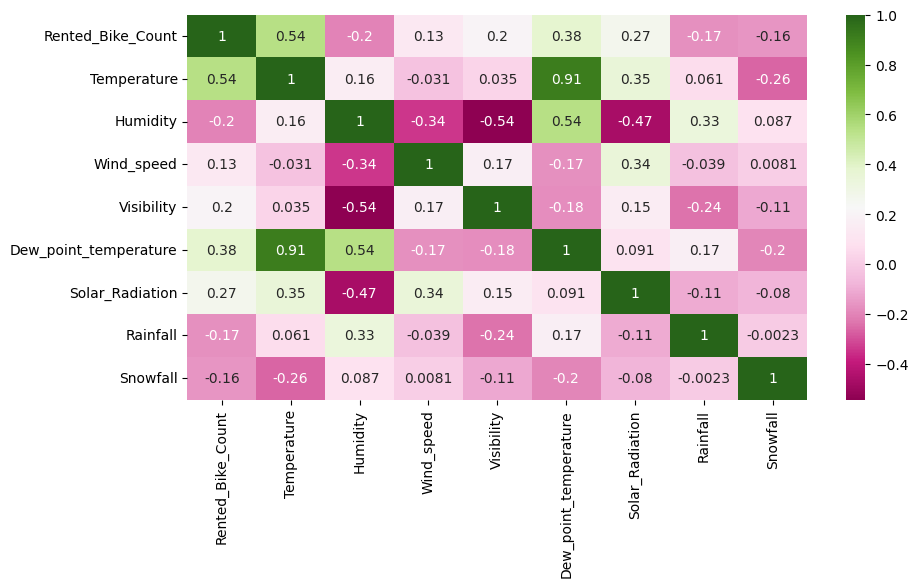

In [60]:
#checking correlation using heatmap
plt.figure(figsize=(10,5))
sns.heatmap(bike_df.corr(),cmap='PiYG',annot=True)

> **We can observe on the heatmap that on the target variable line, the most positively correlated variables to the rent are:**

* the temperature
* the dew point temperature
* the solar radiation

> **And most negatively correlated variables are:**

* 7humidity
* rainfall

> From the above correlation heatmap, We see that there is a positive correlation between columns 'Temperature' and 'Dew point temperature' i.e 0.91 so even if we drop this column then it won't affect the outcome of our analysis. And they have the same variations, so we can drop the column 'Dew point temperature(°C)'.

In [61]:
# drop the Dew point temperature column
bike_df=bike_df.drop(['Dew_point_temperature'],axis=1)

In [62]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rented_Bike_Count  8760 non-null   int64   
 1   Hour               8760 non-null   category
 2   Temperature        8760 non-null   float64 
 3   Humidity           8760 non-null   int64   
 4   Wind_speed         8760 non-null   float64 
 5   Visibility         8760 non-null   int64   
 6   Solar_Radiation    8760 non-null   float64 
 7   Rainfall           8760 non-null   float64 
 8   Snowfall           8760 non-null   float64 
 9   Seasons            8760 non-null   object  
 10  Holiday            8760 non-null   object  
 11  Functioning_Day    8760 non-null   object  
 12  month              8760 non-null   category
 13  weekdays_weekend   8760 non-null   category
dtypes: category(3), float64(5), int64(3), object(3)
memory usage: 779.8+ KB


Text(0.5, 0, 'Feature/Property')

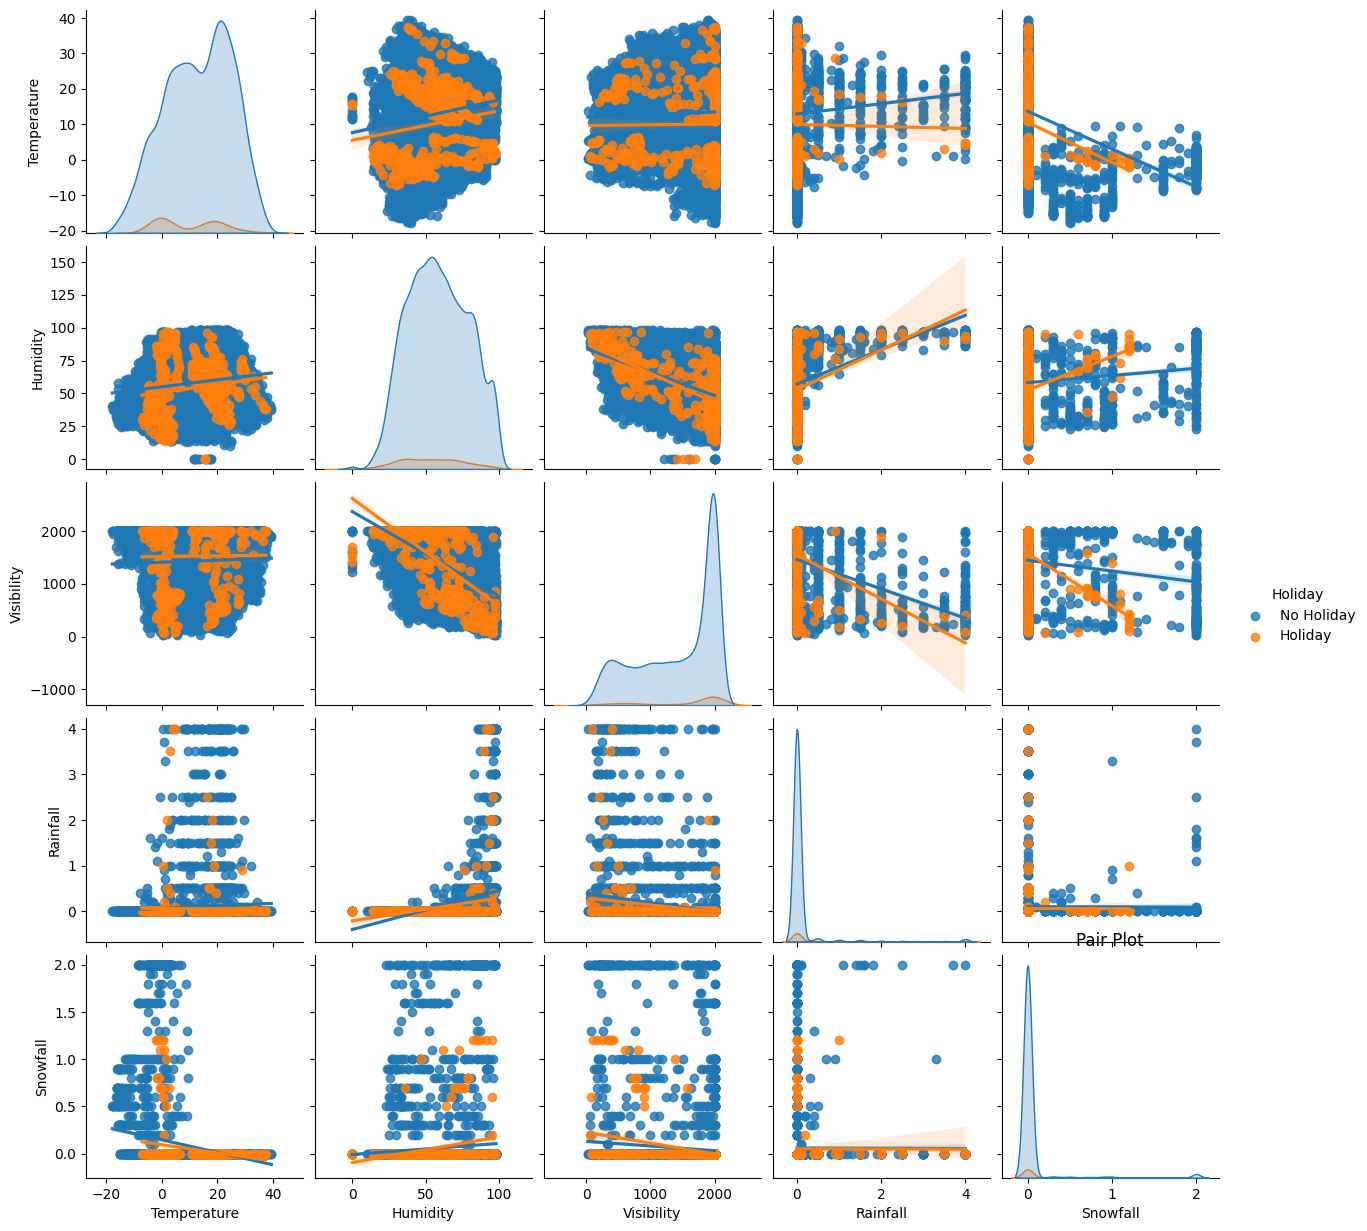

In [63]:
# Pair Plot visualization code
selected_colums =['Temperature', 'Humidity','Visibility',  'Rainfall', 'Snowfall', 'Holiday']
pair_plot_df = bike_df[selected_colums]

# # same can be implemented using the below code
# pair_plot_df = df.copy()
# pair_plot_df.drop(columns = ['Year','Functioning Day', 'Month', 'Day', 'Hour', 'Seasons'], inplace=True)

sns.pairplot(pair_plot_df, diag_kind="kde", kind = 'reg', hue = 'Holiday')

#setting labels to infer the plot
plt.title('Pair Plot')
plt.ylabel('Feature/Property')
plt.xlabel('Feature/Property')

>the diagonal graphs show the kde plotted wrt the own feature, it is noted that the diagonal plots doesnot follow the scale.

##***5. Hypothesis Testing***

> Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

###**Hypothetical Statement - 1**

> Research hypothesis: The average bike count at any point of time is greater than 100.

- Null hypothesis H0: Average = 100.

- Alternate hypothesis Ha: Average > 100.

In [64]:
rented_bike_count_sample = bike_df['Rented_Bike_Count'].sample(500)
rented_bike_count_mean = np.mean(rented_bike_count_sample)
rented_bike_count_std = np.std(rented_bike_count_sample)

In [65]:
ts = (rented_bike_count_mean-100)/(rented_bike_count_std/(np.sqrt(500)))
ts

21.179887620275334

In [66]:
# Calculating the probability
prob_z = norm.cdf(ts, 0, 1)
print(prob_z)

1.0


In [67]:
p1 = 1-prob_z
p1

0.0

> We have chosen Z-test to obtain p-value.

> As we are performing hypothesis testing for mean, we have chosen Z-test to obtain p-value. The probability we have obtained is close to 100%, so we have sufficient evidence to reject H0. Therefore, the average bike count in city at any point of time is greater than 100.

###**Hypothetical Statement - 2**

The average temperature at any point is grater than 10 degree Celsius.

>Null hypothesis H0: Average = 10.

>Alternate hypothesis Ha: Average > 10.

In [68]:
# Perform Statistical Test to obtain P-Value
temp_sample = bike_df['Temperature'].sample(500)
temp_mean = np.mean(temp_sample)
temp_std = np.std(temp_sample)

ts2 = (temp_mean-10)/(temp_std/(np.sqrt(500)))
ts2

6.752309974830573

In [69]:
prob_z = norm.cdf(ts2, 0, 1)
print(prob_z)

0.9999999999927245


In [70]:
p1 = 1-prob_z
p1

7.275513524973576e-12

> We have chosen Z-test to obtain p-value.

> As we are performing hypothesis testing for mean, we have chosen Z-test to obtain p-value. The probability we have obtained is 99%, so we have sufficient evidence to reject H0. Therefore, the average temperature at any point of time is greater than 10 degrees.

###**Hypothetical Statement - 3**

####1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The Standard deviation of humdidity is 20.

>Null hypothesis H0: Standard deviaiton != 20.

>Alternate hypothesis Ha: Standard deviaiton = 20.

In [71]:
# Perform Statistical Test to obtain P-Value
humid_sample = bike_df['Humidity'].sample(50)
S2 = (np.std(humid_sample))**2
ts3 = (49 * S2)/(20*20)
ts3

46.58920000000001

In [72]:
prob = chi2.cdf(ts3,49)
print(prob)

0.42859488119694544


> We have chosen Chi2-test to obtain p-value.

> As we are performing hypothesis testing for standard deviation, we have chosen Chi2-test to obtain p-value. The probability we have obtained is 45.53%, so we have sufficient evidence to reject H0. Therefore, the standard deviation of humidity is 20.

##***6. Feature Engineering & Data Pre-processing***

###Handling Missing Values

In [92]:
# Handling Missing Values & Missing Value Imputation
# There were no missing values present in the database, no manipulations were done

# Missing Values/Null Values Count
missing_values = bike_df.isna().sum()
print(missing_values)

Rented_Bike_Count    0
Hour                 0
Temperature          0
Humidity             0
Wind_speed           0
Visibility           0
Solar_Radiation      0
Rainfall             0
Snowfall             0
Seasons              0
Holiday              0
Functioning_Day      0
month                0
weekdays_weekend     0
dtype: int64


> There were no missing values present in the database, no manipulations were done

### 2. Handling Outliers

after investigating the and plotting box plots we found
1. Wind Speed
2. Solar Radiation
3. Rainfall
4. Snowfall

have got many outliers, but logically we found the values are actually within range and need not to  be clipped as the insites with the extreem values is important.

***The below code can be uncommented to handle the outliers.***

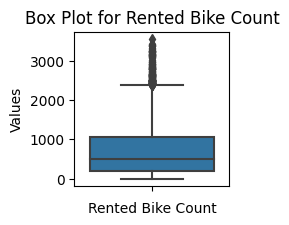

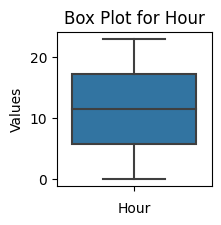

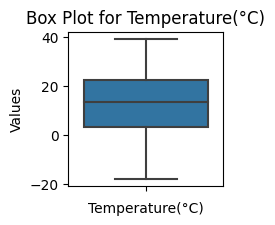

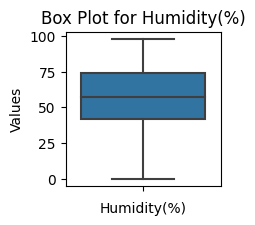

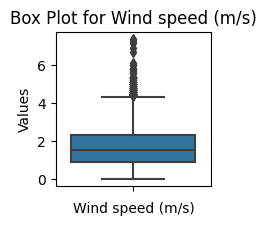

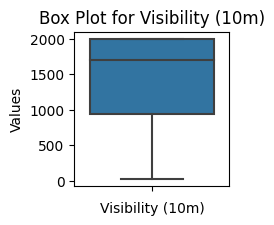

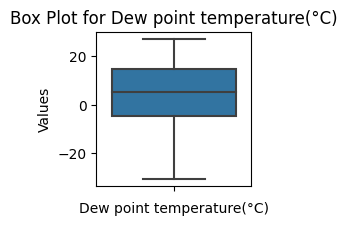

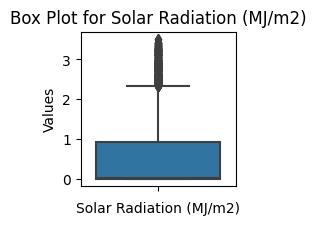

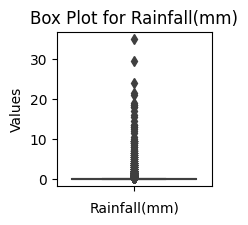

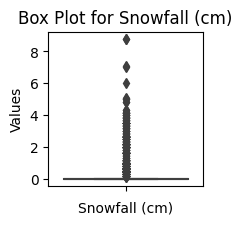

In [93]:
# Handling Outliers & Outlier treatments
numerical_vars = df.describe().columns
for var in numerical_vars:
  plt.figure(figsize=(2, 2))
  sns.boxplot(y=var, data=df)
  plt.xlabel(var)
  plt.ylabel('Values')
  plt.title(f'Box Plot for {var}')
  plt.show()

### 3. Categorical Encoding

In [103]:
# Encode your categorical columns
# convert object type data to dumy variables(binary form)


### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

# we did not come accross any textual data in our dataframe, No textual data preprocessings steps were done.

#### 2. Lower Casing

In [ ]:
# Lower Casing
# we have renamed the columns code comes here


#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
# was not an opyion in our dataframe

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits
# was not an opyion in our dataframe

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
# was not an opyion in our dataframe

In [ ]:
# Remove White spaces
# was not an opyion in our dataframe

#### 6. Rephrase Text

In [ ]:
# Rephrase Text
# was not an opyion in our dataframe

#### 7. Tokenization

In [ ]:
# Tokenization
# was not an opyion in our dataframe

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# was not an opyion in our dataframe

##### Which text normalization technique have you used and why?

was not an opyion in our dataframe

#### 9. Part of speech tagging

In [ ]:
# POS Taging
# was not an option in our dataframe

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text
# was not an option in our dataframe

##### Which text vectorization technique have you used and why?

was not an option in our dataframe

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
# since day and week number are not correlated we are dropping them
df = df.drop(['Day', 'Week Number'],axis=1)

### removing multicollear
df['Total Temp'] = 0.7*df['Temperature'] + 0.3*df['Dew Point Temperature']
df=df.drop(['Temperature','Dew Point Temperature'],axis=1)


As we can see there is multicollinearity between the columns 'Temperature' & 'Dew Point Temperature'. Hence we are creating a new column as 0.7 x Temperature + 0.3 x Dew point Temprature as Total Temperature

##### What all feature selection methods have you used  and why?

1. In EDA we have carried out date column manipulation, we have created 3 new features using the date feature, where we extracted date, month and year
2. We have dropped dew drops features as we saw it coliner with temperature
3. Day and month are less colineraly related with rented bike count ie 0.04 and 0.07 respectively, so we droped them

##### Which all features you found important and why?

The remaining columns are equally important as they have average collineriaty between them

> A dataset may contain various type of values, sometimes it consists of categorical values. So, in-order to use those categorical value for programming efficiently we create dummy variables.

###5. Data Transformation


<Axes: xlabel='Rented_Bike_Count', ylabel='Count'>

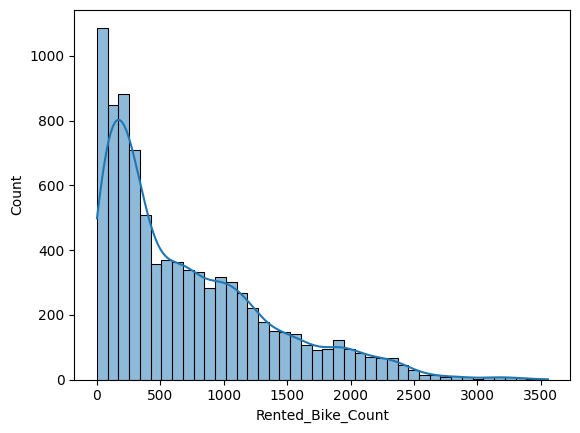

In [75]:
sns.histplot(bike_df['Rented_Bike_Count'],kde=True)

<Axes: xlabel='Rented_Bike_Count', ylabel='Count'>

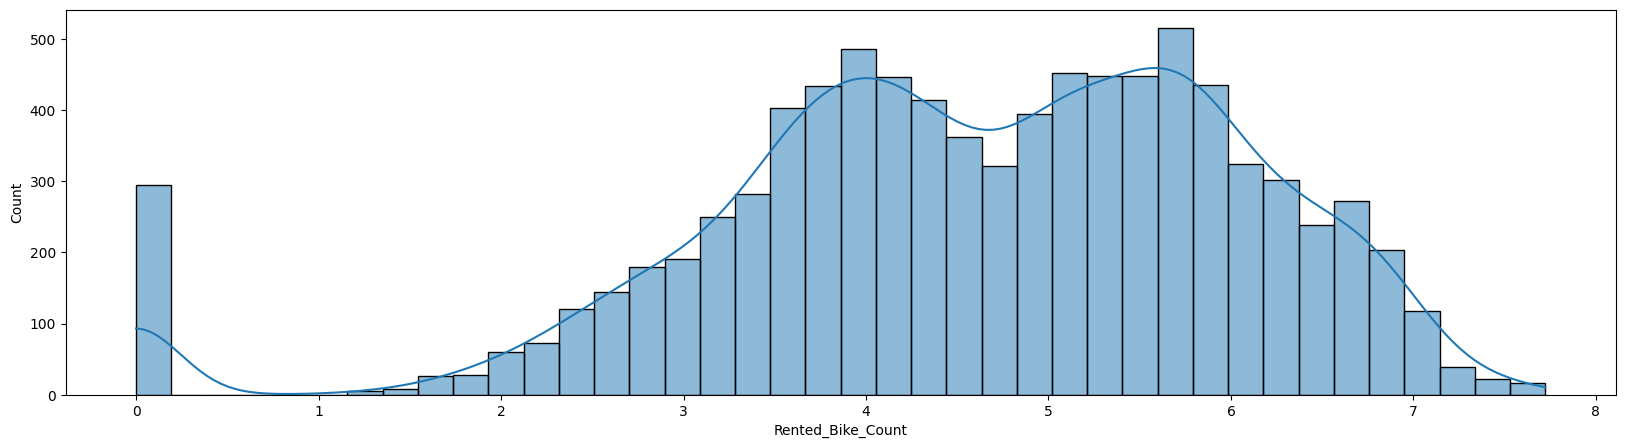

In [104]:
# Transform Your data
bike_df['Rented_Bike_Count']=np.sqrt(bike_df['Rented_Bike_Count'])
sns.histplot(bike_df['Rented_Bike_Count'],kde=True)

### 6. Data Scaling

##### Which method have you used to scale you data and why?

we have used minmax scalar after spliting the data

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

### 8. Data Splitting

In [111]:
# Split your data to train and test. Choose Splitting ratio wisely.
x = bike_df.drop(columns=['Rented_Bike_Count'], axis=0)
y = np.sqrt(bike_df['Rented_Bike_Count'])
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=.20,random_state=4)

In [112]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(7008, 16) (7008,)
(1752, 16) (1752,)


##### What data splitting ratio have you used and why?

As a standard practice we have split the data into 80-20 ratio.

### 9. Handling Imbalanced Dataset

Answer Here.

## ***7. ML Model Implementation***

In [113]:
# initiating test and train dictionary for future reference and comparing values
train={}
test={}

In [114]:
# writing a function to copute all the required test stastics to interpret the results

def modelfit(model, X_train, X_test, y_train, y_test, output_name) :
  '''this function implements the given model calculates the stastics and add the results to train and test dictionaries
  '''
  # Fit the Algorithm
  model.fit(X_train, y_train)
  score = model.score(X_train, y_train)
  print(f'The score for {output_name} is: {score}')

  # Predict on the model
  y_pred_train=model.predict(X_train)
  y_pred_test=model.predict(X_test)
  print('\n')
  print('-'*50)
  print(f'metrics for {output_name} train data set')
  print('-'*50)

  # calculating and printing mean squred error
  MSE = mean_squared_error((y_train), (y_pred_train))
  print(f'MSE : {MSE}')

  mae = mean_absolute_error((y_train), (y_pred_train))
  print(f'Mean absolute Error : {mae}')

  # calculating and printing root mean square error(RMSE)
  RMSE = np.sqrt(MSE)
  print(f'RMSE : {RMSE}')

  # calculating and printing r^2 score
  r2= r2_score(y_train, y_pred_train)
  print(f'R2 : {r2}')

  # calculating and printing Adjusted r^2
  # Formula => Adjusted R-squared = 1 - [(1 - R-squared) * (n - 1) / (n - p - 1)]
  a_r2 = 1-(1-r2)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print(f'Adjusted R^2: {a_r2}')

  # updating the observed values to train dictionary, for future refrences
  train[output_name]=MSE, mae, RMSE, r2, a_r2
  print('\n')

  print('-'*50)
  print(f'metrics for {output_name} test data set')
  print('-'*50)

  # calculating and printing mean squred error
  MSE = mean_squared_error((y_test), (y_pred_test))
  print(f'MSE : {MSE}')

  mae = mean_absolute_error((y_test), (y_pred_test))
  print(f'Mean absolute Error : {mae}')

  # calculating and printing root mean square error(RMSE)
  RMSE = np.sqrt(MSE)
  print(f'RMSE : {RMSE}')

  # calculating and printing r^2 score
  r2= r2_score(y_test, y_pred_test)
  print(f'R2 : {r2}')

  # calculating and printing Adjusted r^2
  a_r2 = 1-(1-r2)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print(f'Adjusted R^2: {a_r2}')

  # updating the observed values to test dictionary, for future refrences
  test[output_name]=MSE, mae, RMSE, r2, a_r2
  print('\n')

  # plotting the actual vs. predicted values
  plt.figure(figsize=(10,5))
  plt.title(f'Actual vs. Predicted for {output_name}')
  plt.plot(np.array(y_pred_test))
  plt.plot(np.array((y_test)))
  plt.legend(["Predicted","Actual"])
  plt.show()

### ML Model - 1
>#### Linear Regression

The score for Linear Regression is: 0.8716281275204065


--------------------------------------------------
metrics for Linear Regression train data set
--------------------------------------------------
MSE : 0.030257280420596507
Mean absolute Error : 0.13150908675086137
RMSE : 0.17394619978774042
R2 : 0.8716281275204065
Adjusted R^2: 0.8704442946906236


--------------------------------------------------
metrics for Linear Regression test data set
--------------------------------------------------
MSE : 0.03052093041511124
Mean absolute Error : 0.1335570167770265
RMSE : 0.1747024052928615
R2 : 0.8761625157202597
Adjusted R^2: 0.8750204985741641




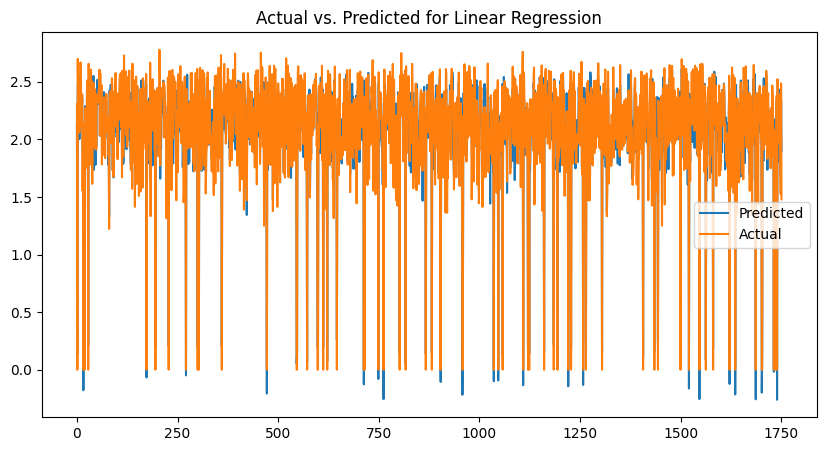

In [121]:
# ML Model - 1 Implementation
LiReg = LinearRegression()
modelfit(LiReg, X_train, X_test, y_train, y_test, 'Linear Regression')

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Linear Regression is a statistical technique used to model the relationship between two variables, typically referred to as the independent variable (or predictor variable) and the dependent variable (or response variable). It assumes a linear relationship between these variables, where a change in the independent variable is associated with a constant change in the dependent variable.

The goal of linear regression is to estimate the parameters of the linear equation that best fits the observed data. The equation is typically represented as:

Y = mX + b

#### 2. Cross- Validation & Hyperparameter Tuning

In [117]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Linear Regression doesnot need hyperparameter tuning

##### Which hyperparameter optimization technique have you used and why?

For Linear Regression we do not do Hyper parameter optimization

For Linear Regression we do not do Hyper parameter optimization

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Adjusted R^2 on Train set is 0.8147645738100666

Adjusted R^2 on test set is 0.8180886844979192


#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 2
> #### Lasso

The score for Lasso without Hyperparameter Tuning is: 0.0980907521962161


--------------------------------------------------
metrics for Lasso without Hyperparameter Tuning train data set
--------------------------------------------------
MSE : 0.21258022102206522
Mean absolute Error : 0.27690279673260126
RMSE : 0.4610642265694284
R2 : 0.0980907521962161
Adjusted R^2: 0.08977343348448097


--------------------------------------------------
metrics for Lasso without Hyperparameter Tuning test data set
--------------------------------------------------
MSE : 0.22563482317723269
Mean absolute Error : 0.2837192380233409
RMSE : 0.4750103400740164
R2 : 0.08449550888074786
Adjusted R^2: 0.07605281616725623




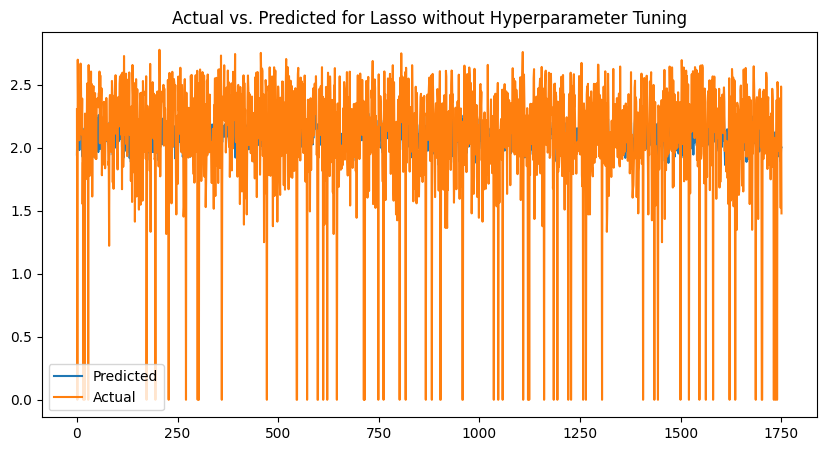

In [122]:
lasso = Lasso()
modelfit(lasso, X_train, X_test, y_train, y_test, 'Lasso without Hyperparameter Tuning')

In [123]:
# ML Model - 2 Implementation

# Hyperparameter Tuning
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso,parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)
print(f'The best fit alpha value is found out to be : {lasso_regressor.best_params_}')
print(f'Using {lasso_regressor.best_params_} the negative mean squared error is: {lasso_regressor.best_score_}')

The best fit alpha value is found out to be : {'alpha': 0.0001}
Using {'alpha': 0.0001} the negative mean squared error is: -0.030445403264241982


The score for Lasso with Hyperparameter Tuning is: 0.8716246555183077


--------------------------------------------------
metrics for Lasso with Hyperparameter Tuning train data set
--------------------------------------------------
MSE : 0.030258098772304676
Mean absolute Error : 0.1315524313720093
RMSE : 0.17394855208453067
R2 : 0.8716246555183077
Adjusted R^2: 0.8704407906700615


--------------------------------------------------
metrics for Lasso with Hyperparameter Tuning test data set
--------------------------------------------------
MSE : 0.03053546426651219
Mean absolute Error : 0.13363548737165248
RMSE : 0.17474399636757823
R2 : 0.8761035451852889
Adjusted R^2: 0.8749609842186978




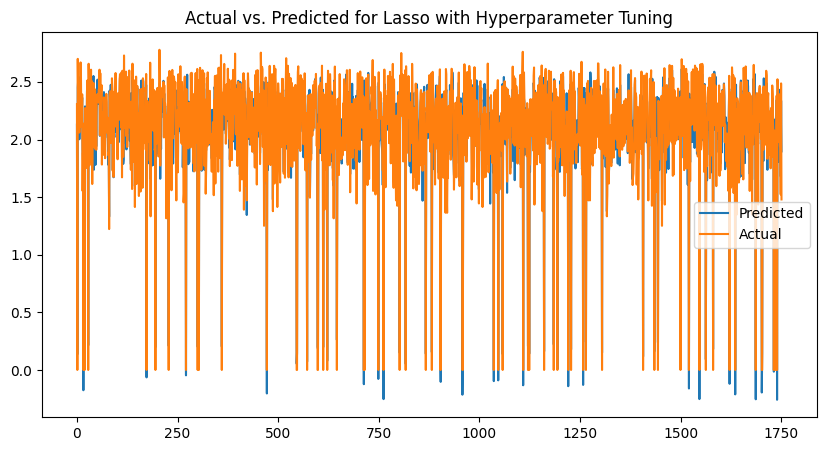

In [124]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
lasso=Lasso(alpha=0.0001,max_iter=4000)
modelfit(lasso, X_train, X_test, y_train, y_test, 'Lasso with Hyperparameter Tuning')

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Lasso, also known as L1 regularization, is a linear regression technique used in machine learning and statistics to prevent overfitting and select a subset of important features from a larger set of predictors. It adds a penalty term to the linear regression objective function, which is the absolute value of the coefficients multiplied by a tuning parameter called the regularization strength. This penalty encourages the model to shrink the coefficients of less important features to exactly zero, effectively eliminating them from the model. This results in a sparse model with a subset of predictors that are most relevant to the prediction task, making it useful for feature selection and model interpretability. Lasso is particularly effective when dealing with datasets that have a large number of predictors and may suffer from multicollinearity, as it can automatically perform feature selection and regularization simultaneously.



#### 2. Cross- Validation & Hyperparameter Tuning

##### Which hyperparameter optimization technique have you used and why?

We have used Grid search CV as hyperparameter optimization technique. It finds the optimal aplha value for which the model is able to perform better.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No significant improvement seen

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

### ML Model - 3
> Ridge

The score for Ridge without Hyperparameter Tuning is: 0.8716132430835868


--------------------------------------------------
metrics for Ridge without Hyperparameter Tuning train data set
--------------------------------------------------
MSE : 0.030260788685842307
Mean absolute Error : 0.13156942080741976
RMSE : 0.17395628383545766
R2 : 0.8716132430835868
Adjusted R^2: 0.8704292729909858


--------------------------------------------------
metrics for Ridge without Hyperparameter Tuning test data set
--------------------------------------------------
MSE : 0.030556527802544753
Mean absolute Error : 0.13369675698707326
RMSE : 0.17480425567629854
R2 : 0.8760180807097033
Adjusted R^2: 0.8748747315980925




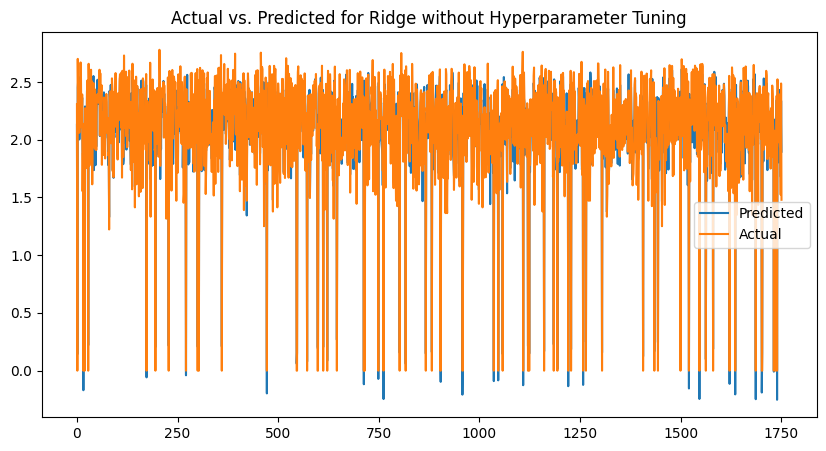

In [125]:
ridge=Ridge()
modelfit(ridge, X_train, X_test, y_train, y_test, 'Ridge without Hyperparameter Tuning')

In [126]:
# ML Model - 3 Implementation
ridge=Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -0.03045935636673776


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The score for Ridge with Hyperparameter Tuning is: 0.8716132430835868


--------------------------------------------------
metrics for Ridge with Hyperparameter Tuning train data set
--------------------------------------------------
MSE : 0.030260788685842307
Mean absolute Error : 0.13156942080741976
RMSE : 0.17395628383545766
R2 : 0.8716132430835868
Adjusted R^2: 0.8704292729909858


--------------------------------------------------
metrics for Ridge with Hyperparameter Tuning test data set
--------------------------------------------------
MSE : 0.030556527802544753
Mean absolute Error : 0.13369675698707326
RMSE : 0.17480425567629854
R2 : 0.8760180807097033
Adjusted R^2: 0.8748747315980925




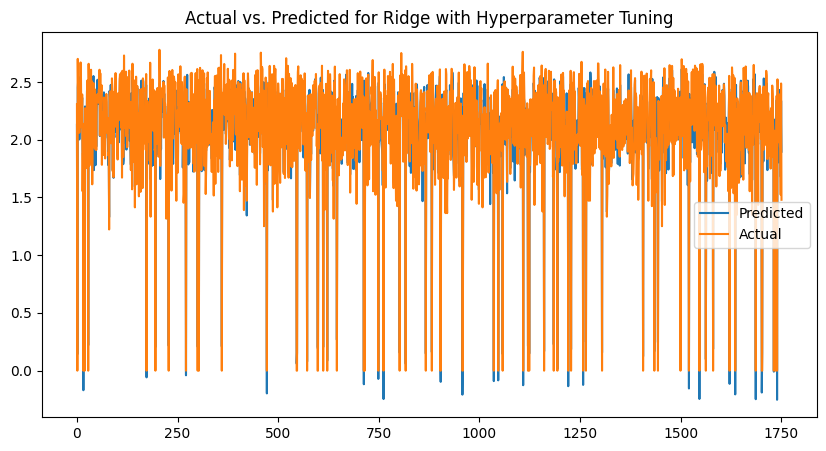

In [127]:
# Visualizing evaluation Metric Score chart
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
ridge= Ridge(alpha=1)
# Fit the Algorithm
modelfit(ridge, X_train, X_test, y_train, y_test, 'Ridge with Hyperparameter Tuning')

Ridge is a type of regularization technique used in machine learning, particularly in linear regression. It helps prevent overfitting by adding a penalty term to the loss function during model training. The penalty term is proportional to the square of the magnitude of the model's coefficients, which are the parameters that determine the relationship between input features and the predicted output. Ridge regularization encourages the model to use smaller coefficients, resulting in a simpler and more generalizable model. It is also known as L2 regularization because it adds the squared L2 norm of the coefficients to the loss function. Ridge can be tuned with a hyperparameter called the regularization strength, which controls the trade-off between fitting the data and regularizing the model. A higher regularization strength results in more regularization and a simpler model, while a lower regularization strength allows the model to fit the data more closely. Ridge is widely used in machine learning for regression tasks when dealing with multicollinearity or high-dimensional data.

#### 2. Cross- Validation & Hyperparameter Tuning

In [128]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

We have used Grid search CV as hyperparameter optimization technique. It finds the optimal aplha value for which the model is able to perform better.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No significant improvement seen

### ML Model 4
> ElasticNet

The score for ElasticNet is: 0.8711904462444837


--------------------------------------------------
metrics for ElasticNet train data set
--------------------------------------------------
MSE : 0.030360441999878966
Mean absolute Error : 0.1320789465290231
RMSE : 0.17424248046868182
R2 : 0.8711904462444837
Adjusted R^2: 0.8700025771608594


--------------------------------------------------
metrics for ElasticNet test data set
--------------------------------------------------
MSE : 0.03080805558919092
Mean absolute Error : 0.13446151032895326
RMSE : 0.17552223673708958
R2 : 0.8749975165296124
Adjusted R^2: 0.8738447558751306




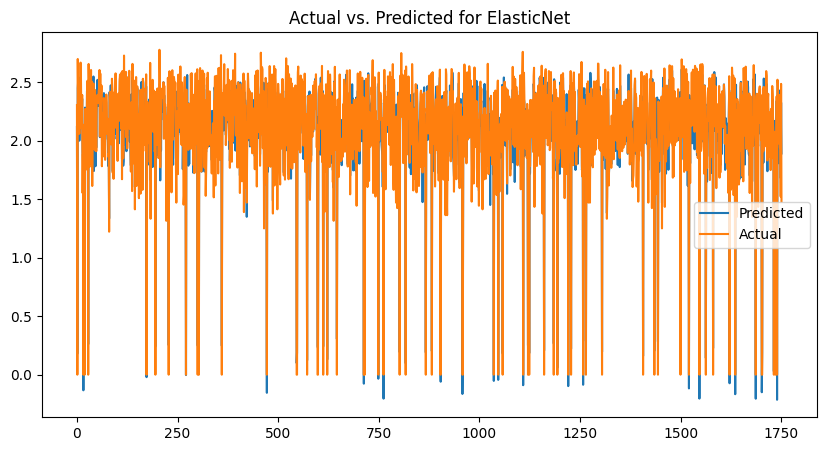

In [129]:
elasticnet = ElasticNet(alpha=0.001, l1_ratio=0.5)

modelfit(elasticnet, X_train, X_test, y_train, y_test, 'ElasticNet')

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

ElasticNet is a statistical method used for linear regression, which combines the L1 (Lasso) and L2 (Ridge) regularization techniques. It aims to overcome the limitations of both methods by adding a mixture of both penalties to the linear regression model. ElasticNet introduces two hyperparameters, alpha and l1_ratio, which control the strength of regularization and the balance between L1 and L2 regularization, respectively. This allows ElasticNet to handle multicollinearity in the data, select relevant features, and achieve better prediction performance compared to Lasso or Ridge alone. In summary, ElasticNet is a flexible regularization technique that combines the advantages of Lasso and Ridge regularization to improve linear regression models by preventing overfitting and improving model interpretability.

#### 2. Cross- Validation & Hyperparameter Tuning

##### Which hyperparameter optimization technique have you used and why?

No Hyperparameter tuning for Elastic Net

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No significant improvement seen, the model performance decreased comapred to linear regression

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model 5
>  Random Forest

The score for Random Forest is: 0.9951230374926779


--------------------------------------------------
metrics for Random Forest train data set
--------------------------------------------------
MSE : 0.0011495012056339457
Mean absolute Error : 0.02051796234220857
RMSE : 0.033904294796293075
R2 : 0.9951230374926779
Adjusted R^2: 0.9950780626222934


--------------------------------------------------
metrics for Random Forest test data set
--------------------------------------------------
MSE : 0.007793947823001759
Mean absolute Error : 0.05415568032365465
RMSE : 0.0882833383091156
R2 : 0.9683763608159788
Adjusted R^2: 0.9680847307139936




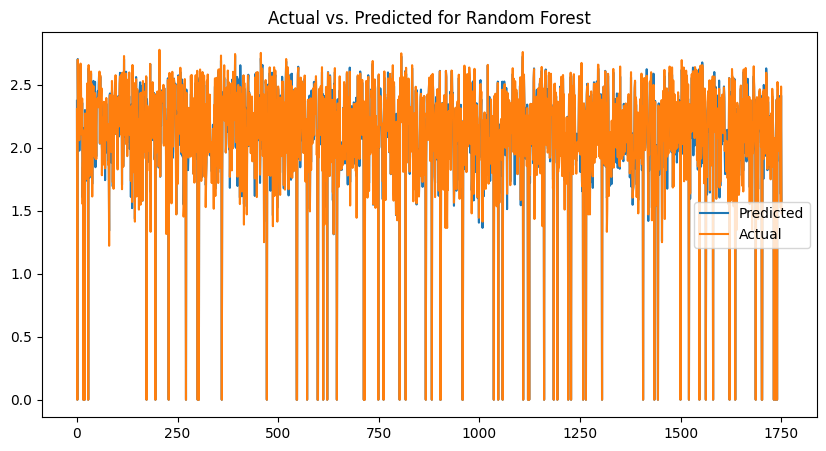

In [130]:
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor()
modelfit(rf_model, X_train, X_test, y_train, y_test, 'Random Forest')


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Random Forest is a popular machine learning algorithm used for both classification and regression tasks. It is an ensemble method that combines multiple decision trees to make more accurate predictions. The algorithm creates a "forest" of decision trees by randomly selecting a subset of features and data samples from the training dataset. Each tree in the forest is trained independently on these subsets, and their predictions are combined to obtain the final output.

#### 2. Cross- Validation & Hyperparameter Tuning

##### Which hyperparameter optimization technique have you used and why?

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Improvement seen

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML model 6
>  Support Vector Regressor


The score for Support Vector Regressor is: 0.14355649260974446


--------------------------------------------------
metrics for Support Vector Regressor train data set
--------------------------------------------------
MSE : 0.20186393535410588
Mean absolute Error : 0.23011877131394312
RMSE : 0.4492927056542381
R2 : 0.14355649260974446
Adjusted R^2: 0.13565845450124647


--------------------------------------------------
metrics for Support Vector Regressor test data set
--------------------------------------------------
MSE : 0.21857470144867772
Mean absolute Error : 0.23669887506045412
RMSE : 0.4675197337532157
R2 : 0.11314167731931224
Adjusted R^2: 0.10496315676433188




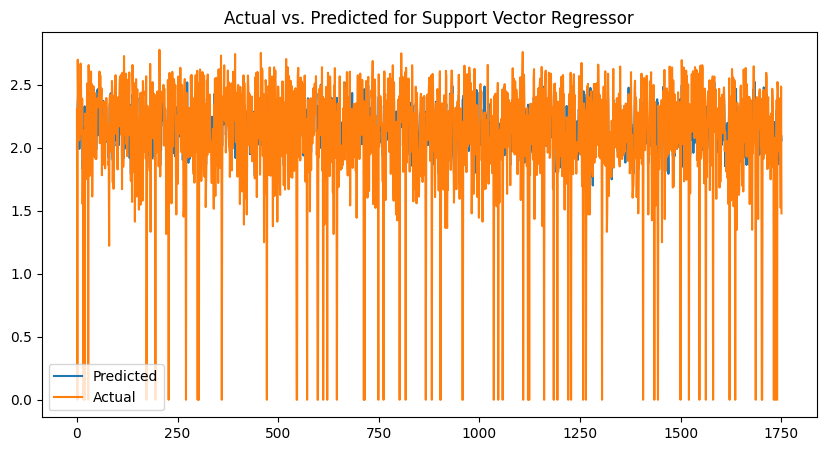

In [131]:
from sklearn.svm import SVR
support_vector = SVR(kernel = 'rbf')
modelfit(support_vector, X_train, X_test, y_train, y_test, 'Support Vector Regressor')

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Support Vector Regressor (SVR) is a supervised machine learning algorithm used for regression tasks. It is based on the Support Vector Machine (SVM) algorithm, which is commonly used for classification tasks. SVR is designed to predict continuous numerical values rather than discrete classes.

#### 2. Cross- Validation & Hyperparameter Tuning

##### Which hyperparameter optimization technique have you used and why?

No Hyperparameter tuning for Support vector Regressor

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

it is found that this model fails drastically

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

it is found that this model fails drastically

### ML model 7
> Decision Tree Regressor

The score for Decision Tree Regressor is: 1.0


--------------------------------------------------
metrics for Decision Tree Regressor train data set
--------------------------------------------------
MSE : 0.0
Mean absolute Error : 0.0
RMSE : 0.0
R2 : 1.0
Adjusted R^2: 1.0


--------------------------------------------------
metrics for Decision Tree Regressor test data set
--------------------------------------------------
MSE : 0.45793365111878714
Mean absolute Error : 0.41735716701531395
RMSE : 0.6767079511272105
R2 : 0.8018911274012772
Adjusted R^2: 0.7963073188958523




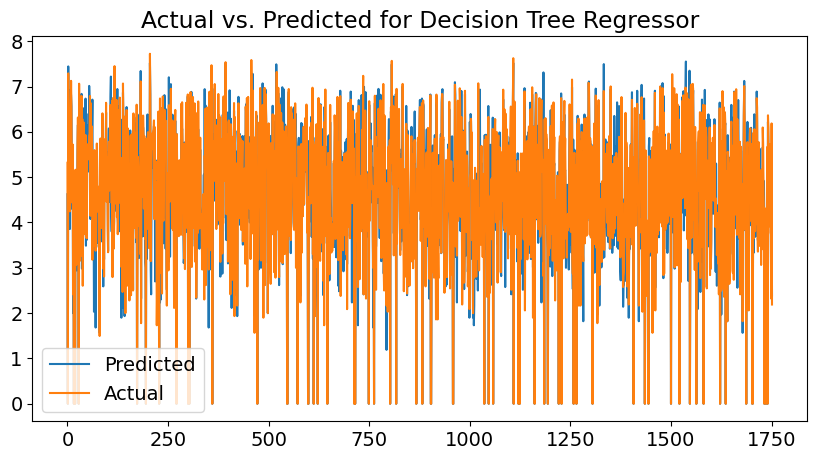

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
modelfit(dtr, X_train, X_test, y_train, y_test, 'Decision Tree Regressor')

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Decision Tree Regressor is a machine learning algorithm used for regression tasks, which involves predicting a continuous target variable. It works by recursively splitting the feature space into subsets based on the values of input features, and then predicting the target value for each subset. The splits are determined based on a set of predefined rules or criteria, such as minimizing the variance of the target variable or maximizing the information gain. The resulting tree-like structure allows for easy interpretation and visualization. Decision Tree Regressor can handle both numerical and categorical features, and is capable of capturing non-linear relationships between features and the target variable. However, it is prone to overfitting and may not perform well on complex datasets with noisy or sparse data. Regularization techniques, such as pruning or setting maximum depth, can be applied to mitigate overfitting.

#### 2. Cross- Validation & Hyperparameter Tuning

##### Which hyperparameter optimization technique have you used and why?

No Hyperparameter tuning for Decision Tree Regressor

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No significant improvement seen, the model performance decreased comapred to Random Forest

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

We have used Grid search CV as hyperparameter optimization technique. It finds the optimal aplha value for which the model is able to perform better.

### 2. Explain the model which you have used and the feature importance using any model explainability tool?

In [134]:
features = x.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

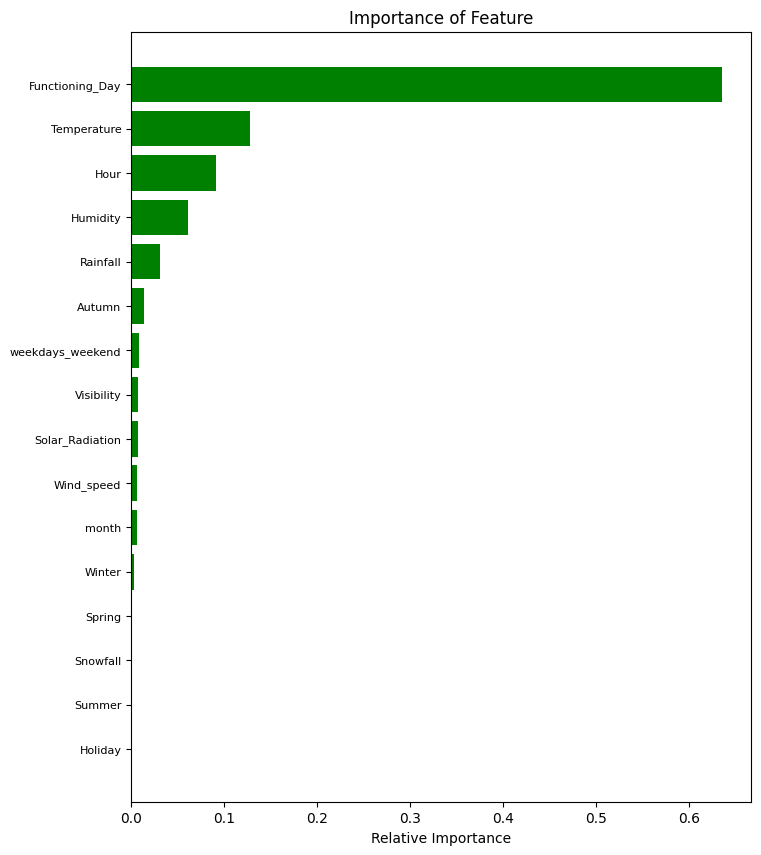

In [135]:
#Plotting figure
plt.figure(figsize=(8,10))
plt.title('Importance of Feature')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices], fontsize = 8)
plt.xlabel('Relative Importance')

plt.show()


## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [137]:
# # Save the File
import pickle
pickle_path = path + 'RandomForestRegressor.pkl'

# serialize process (wb=write byte)
pickle.dump(rf_model, open(pickle_path,'wb'))
# Assuming you have trained and saved your machine learning model in the 'model' variable


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [138]:
# Load the File and predict unseen data.


# Load the saved model from the pickle file
Regression_model= pickle.load(open(pickle_path,'rb'))

# Predicting the unseen data(test set)
Regression_model.predict(X_test)

array([2.37374512, 0.        , 2.7053521 , ..., 1.6338274 , 2.41647529,
       1.57930609])

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

## **Conclusion**

> During our analysis, we conducted an initial exploratory data analysis (EDA) on all the features in our dataset. Firstly, we analysed our dependent variable 'Rented Bike count' and applied transformations as necessar. We then examined the categorical variables and removed those with majority of one class. We also studied the numerical variables, calculated their correlations, distribution and the their relationships with the dependent variable.

> Additionally we removed some numerical features that contained mostly 0 values and applied one-hot encoding to the categorical variables.
Subsequently, we employed 7 machine learning algorithms including Linear Regression,Lasso , Ridge, Elastic Net, Decision Tree, Random Forest and Gradient Booster.

>  Also performed hyperparameter tuning to enhance the performance of our models. The evaluation of our models resulted in the following findings :

> We train a model to predict the number of rented bike count in given weather conditions. First, we do Exploratory Data Analysis on the data set.

>  We look for null values that is not found in dataset and outliers and appropriately modify them. We also perform correlation analysis to extract out the important and relevant feature set and later perform feature engineering.

* Gradient Boosting gridsearchcv model shows promising result with R2 score of 0.91, therefore it can be used to solve this problem.
* Temperatue, Functioning_Day_Yes, Humidity, Rainfall and  Solar radiation are major driving factors for the Bike rent demand.
* Bike demand shows peek around 8-9 AM in the morning and 6 - 7pm in the evening.
* People prefer to rent bike more in summer than in winter.
* Bike demand is more on clear days than on snowy or rainy days.
* Temperature range from 22 to 25(°C) has more demand for bike.

> **Considering adjusted r^2 score on test stastics we have selected Random Forest as best performing model with accuracy of 91.37%**

> Although the current analysis may be insightful, it is important to note that the dataset is time-dependent and variables such as temperature, windspeed and solar radiation may not always remain consistent. As a result there may be situations where the model fails to perform well. As field of machine learning is constantly evolving, it is necessary to stay uo-to-date with the latest developments and be prepared to handle unexpected scenarios. Maintaining a strong understanding of Machine Learning concepts will undoubtely provide an advantage in staying ahead in the future.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***